* **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

* **Importing the train and test data**

In [3]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [4]:
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_advc.csv')

* **Exploratory Data Analysis**
* Univariate, Multivariate Analysis

In [5]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [6]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [7]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [8]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [9]:
pharma_data.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [10]:
pharma_data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

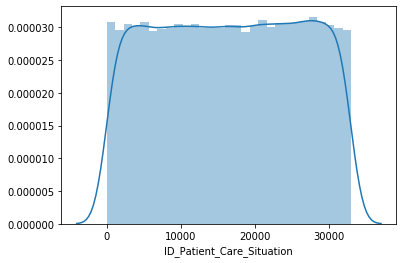

In [11]:
sns.distplot(pharma_data['ID_Patient_Care_Situation'])

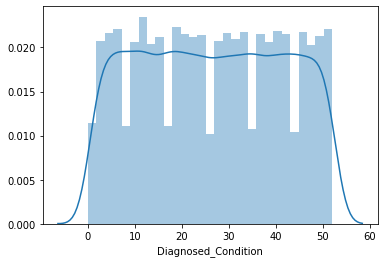

In [12]:
sns.distplot(pharma_data['Diagnosed_Condition'])

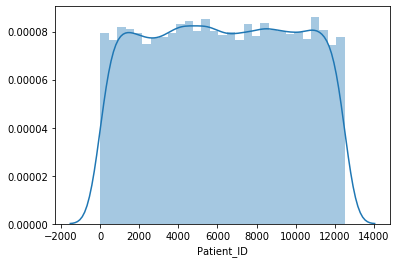

In [13]:
sns.distplot(pharma_data['Patient_ID'])

[Text(0, 0, 'DX6'),
 Text(0, 0, 'DX2 '),
 Text(0, 0, 'DX1 '),
 Text(0, 0, 'DX3 '),
 Text(0, 0, 'DX5 '),
 Text(0, 0, 'DX4 '),
 Text(0, 0, 'DX2 DX5 '),
 Text(0, 0, 'DX2 DX3 '),
 Text(0, 0, 'DX1 DX3 '),
 Text(0, 0, 'DX1 DX2 '),
 Text(0, 0, 'DX3 DX4 '),
 Text(0, 0, 'DX1 DX4 '),
 Text(0, 0, 'DX1 DX5 '),
 Text(0, 0, 'DX2 DX4 DX5 '),
 Text(0, 0, 'DX1 DX2 DX3 '),
 Text(0, 0, 'DX3 DX5 '),
 Text(0, 0, 'DX2 DX4 '),
 Text(0, 0, 'DX3 DX4 DX5 '),
 Text(0, 0, 'DX2 DX3 DX5 '),
 Text(0, 0, 'DX1 DX2 DX3 DX4 '),
 Text(0, 0, 'DX4 DX5 '),
 Text(0, 0, 'DX2 DX3 DX4 '),
 Text(0, 0, 'DX1 DX4 DX5 '),
 Text(0, 0, 'DX1 DX2 DX4 '),
 Text(0, 0, 'DX1 DX3 DX5 '),
 Text(0, 0, 'DX1 DX2 DX5 '),
 Text(0, 0, 'DX1 DX3 DX4 '),
 Text(0, 0, 'DX1 DX3 DX4 DX5 '),
 Text(0, 0, 'DX1 DX2 DX4 DX5 '),
 Text(0, 0, 'DX2 DX3 DX4 DX5 '),
 Text(0, 0, 'DX1 DX2 DX3 DX5 '),
 Text(0, 0, 'DX1 DX2 DX3 DX4 DX5 ')]

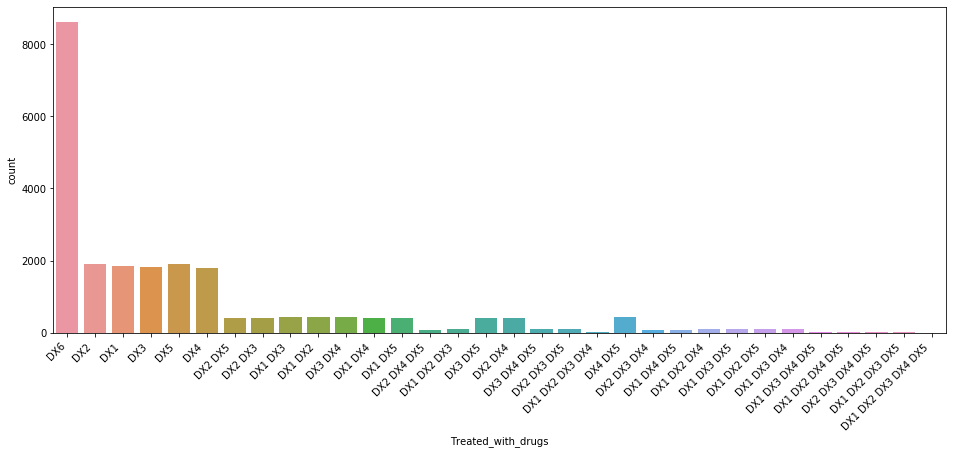

In [14]:
plt.figure(figsize=(16, 6))
chart = sns.countplot(x = 'Treated_with_drugs', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

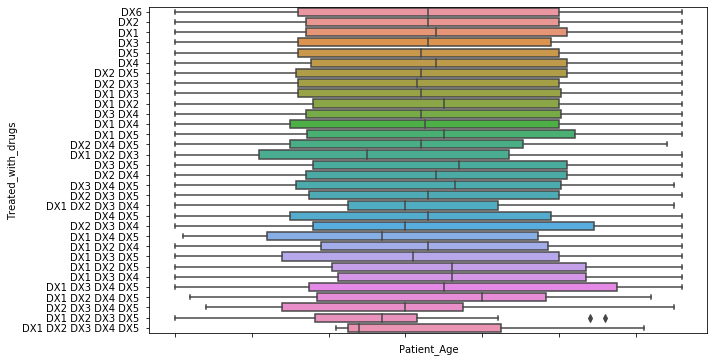

In [15]:
plt.figure(figsize = (10,6))
chart = sns.boxplot(x = 'Patient_Age', y = 'Treated_with_drugs', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

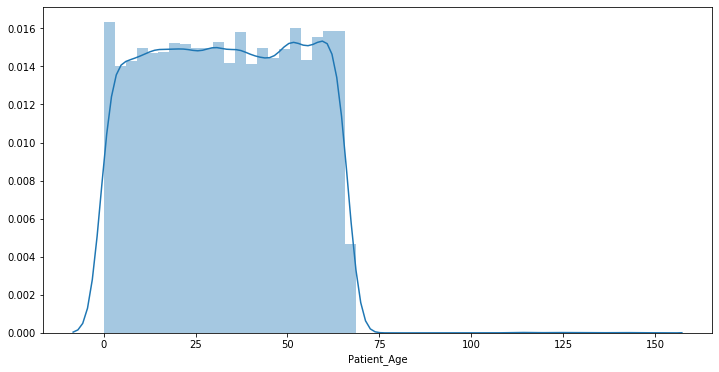

In [16]:
plt.figure(figsize = (12,6))
sns.distplot(pharma_data['Patient_Age'])

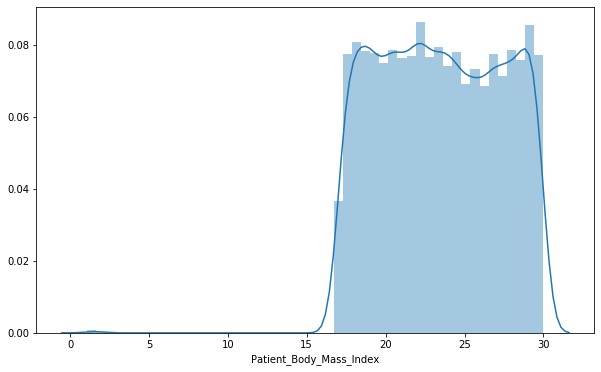

In [17]:
plt.figure(figsize=(10, 6))
sns.distplot(pharma_data['Patient_Body_Mass_Index'])

[Text(0, 0, 'YES'), Text(0, 0, 'NO'), Text(0, 0, 'Cannot say')]

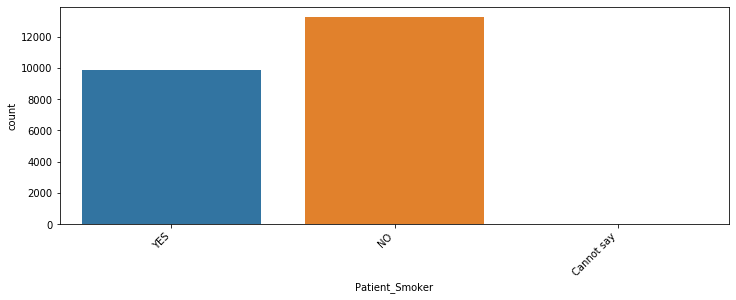

In [18]:
plt.figure(figsize = (12, 4))
chart = sns.countplot(x = 'Patient_Smoker', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [19]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [20]:
pharma_data['Treated_with_drugs'].replace(to_replace = np.nan, value = 'DX6',inplace = True)

[Text(0, 0, 'DX6'),
 Text(0, 0, 'DX2 '),
 Text(0, 0, 'DX1 '),
 Text(0, 0, 'DX3 '),
 Text(0, 0, 'DX5 '),
 Text(0, 0, 'DX4 '),
 Text(0, 0, 'DX2 DX5 '),
 Text(0, 0, 'DX2 DX3 '),
 Text(0, 0, 'DX1 DX3 '),
 Text(0, 0, 'DX1 DX2 '),
 Text(0, 0, 'DX3 DX4 '),
 Text(0, 0, 'DX1 DX4 '),
 Text(0, 0, 'DX1 DX5 '),
 Text(0, 0, 'DX2 DX4 DX5 '),
 Text(0, 0, 'DX1 DX2 DX3 '),
 Text(0, 0, 'DX3 DX5 '),
 Text(0, 0, 'DX2 DX4 '),
 Text(0, 0, 'DX3 DX4 DX5 '),
 Text(0, 0, 'DX2 DX3 DX5 '),
 Text(0, 0, 'DX1 DX2 DX3 DX4 '),
 Text(0, 0, 'DX4 DX5 '),
 Text(0, 0, 'DX2 DX3 DX4 '),
 Text(0, 0, 'DX1 DX4 DX5 '),
 Text(0, 0, 'DX1 DX2 DX4 '),
 Text(0, 0, 'DX1 DX3 DX5 '),
 Text(0, 0, 'DX1 DX2 DX5 '),
 Text(0, 0, 'DX1 DX3 DX4 '),
 Text(0, 0, 'DX1 DX3 DX4 DX5 '),
 Text(0, 0, 'DX1 DX2 DX4 DX5 '),
 Text(0, 0, 'DX2 DX3 DX4 DX5 '),
 Text(0, 0, 'DX1 DX2 DX3 DX5 '),
 Text(0, 0, 'DX1 DX2 DX3 DX4 DX5 ')]

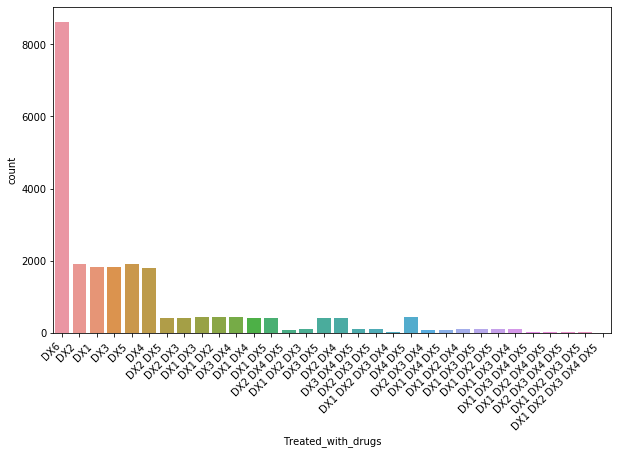

In [21]:
plt.figure(figsize = (10,6))
chart = sns.countplot(x  = 'Treated_with_drugs', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

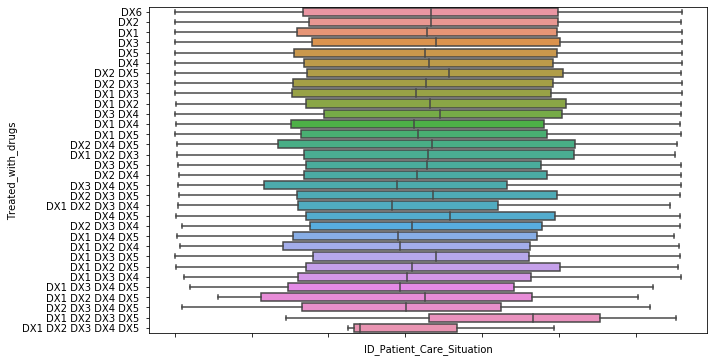

In [22]:
plt.figure(figsize = (10,6))
chart = sns.boxplot(x = 'ID_Patient_Care_Situation',y = 'Treated_with_drugs', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [23]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].apply(lambda x: x.strip())

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

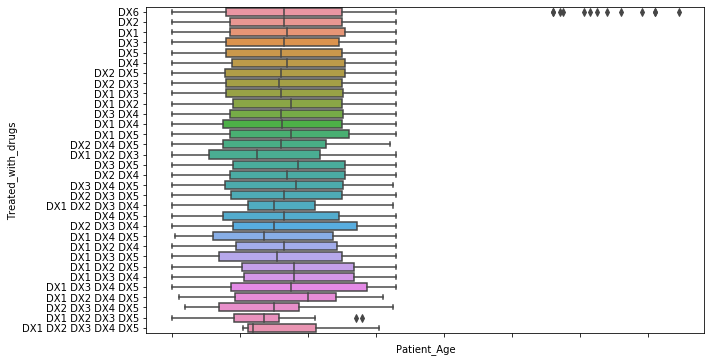

In [24]:
plt.figure(figsize = (10,6))
chart = sns.boxplot(x = 'Patient_Age', y = 'Treated_with_drugs', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

* **Finding the Outliers and replacing**

In [25]:
dx6_mean = np.round(pharma_data[pharma_data['Treated_with_drugs'] == 'DX6']['Patient_Age'].mean())

In [26]:
dx6_mean

33.0

In [27]:
Q1 = pharma_data[pharma_data['Treated_with_drugs'] == 'DX6']['Patient_Age'].quantile(0.25)
Q3 = pharma_data[pharma_data['Treated_with_drugs'] == 'DX6']['Patient_Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

34.0


In [28]:
def outlier_fun(cols):
    d = cols[0]
    p = cols[1]
    print(d)
    print(p)
    if d == 'DX6':
        if p < (Q1 - 1.5 * IQR):
            return 33
        elif p > (Q3 + 1.5 * IQR):
            return 33
        else:
            return p
    else:
        return p

pharma_data['Patient_Age'] = pharma_data[['Treated_with_drugs','Patient_Age']].apply(outlier_fun, axis =1)

DX6
56
DX2
36
DX6
48
DX1
5
DX6
128
DX6
47
DX3
53
DX5
3
DX4
62
DX6
46
DX6
60
DX6
26
DX5
41
DX5
23
DX1
22
DX6
62
DX5
58
DX6
28
DX6
15
DX3
22
DX1
60
DX6
3
DX6
2
DX6
42
DX2 DX5
29
DX6
31
DX6
14
DX2
44
DX2 DX3
16
DX5
19
DX2
11
DX3
29
DX5
58
DX2
40
DX4
62
DX6
31
DX1
4
DX1 DX3
26
DX1
29
DX1
58
DX6
54
DX2 DX5
12
DX6
60
DX4
37
DX3
43
DX6
62
DX6
23
DX2
64
DX5
19
DX6
11
DX6
37
DX3
2
DX6
43
DX1 DX2
40
DX3 DX4
12
DX1 DX4
19
DX1 DX3
7
DX3
52
DX2
31
DX6
31
DX6
24
DX3
6
DX6
32
DX6
4
DX3
65
DX1 DX5
37
DX6
59
DX6
55
DX2 DX4 DX5
41
DX5
50
DX2 DX5
65
DX6
44
DX1 DX2 DX3
11
DX5
13
DX6
66
DX1 DX5
40
DX4
41
DX6
15
DX1 DX3
59
DX3
42
DX3
29
DX1 DX2
37
DX6
14
DX3
65
DX2
44
DX6
60
DX1 DX4
41
DX3 DX5
15
DX3
17
DX3 DX5
7
DX6
26
DX6
62
DX2
48
DX4
66
DX6
39
DX6
47
DX6
53
DX2
49
DX2
32
DX2
46
DX1 DX4
37
DX1
66
DX1
64
DX2 DX5
33
DX2 DX4
41
DX4
41
DX1
52
DX5
13
DX3 DX4 DX5
12
DX6
44
DX6
11
DX3
66
DX3
51
DX6
35
DX3
64
DX2 DX4
9
DX5
4
DX2
41
DX2 DX5
30
DX6
41
DX2 DX4
44
DX6
18
DX6
41
DX6
53
DX6
44
DX2
33
DX2 DX4
57
DX1 DX

40
DX6
11
DX1 DX4
0
DX6
36
DX5
52
DX1 DX5
55
DX3
9
DX6
61
DX2 DX3
53
DX3
61
DX6
57
DX6
62
DX3
59
DX1 DX5
34
DX6
58
DX6
6
DX4
8
DX6
55
DX6
41
DX3 DX4
22
DX6
40
DX6
25
DX6
26
DX1 DX2 DX4
29
DX3 DX4
52
DX3
8
DX3
48
DX6
50
DX6
22
DX1 DX2
25
DX1
29
DX6
25
DX6
36
DX2
17
DX6
35
DX6
51
DX4
11
DX6
43
DX6
15
DX2
10
DX6
5
DX3 DX4
34
DX6
5
DX6
25
DX2
23
DX3
9
DX6
33
DX1
38
DX1 DX3
61
DX6
29
DX6
44
DX5
40
DX6
42
DX2 DX5
46
DX6
54
DX1 DX5
38
DX1 DX3
11
DX2 DX5
52
DX2
58
DX1 DX2
59
DX4
47
DX6
21
DX5
54
DX6
23
DX6
46
DX6
65
DX6
18
DX6
10
DX3
48
DX1 DX4
38
DX2 DX5
22
DX6
13
DX6
3
DX1
12
DX6
59
DX1
22
DX2 DX5
46
DX2
20
DX2
55
DX2
61
DX6
47
DX6
0
DX6
21
DX1 DX3
12
DX3 DX4
21
DX2 DX3
30
DX2
66
DX6
2
DX6
0
DX3
6
DX6
52
DX6
55
DX1
37
DX5
43
DX4
42
DX1
1
DX2
17
DX5
44
DX6
23
DX1 DX5
58
DX6
62
DX6
65
DX6
12
DX6
14
DX2
41
DX2 DX5
22
DX5
44
DX5
37
DX6
16
DX6
20
DX2
53
DX2
64
DX2 DX4
11
DX6
54
DX6
35
DX6
14
DX6
35
DX6
27
DX6
40
DX6
64
DX2
31
DX1 DX2 DX4
22
DX4
54
DX2
17
DX6
14
DX5
33
DX6
39
DX6
52
DX1
5
DX4
65
D

63
DX5
4
DX6
35
DX5
31
DX6
15
DX5
51
DX3 DX4
14
DX4
38
DX1 DX3
36
DX6
43
DX5
11
DX3
49
DX6
9
DX6
61
DX1 DX2
61
DX4
56
DX6
65
DX6
50
DX6
57
DX5
0
DX6
58
DX6
18
DX6
16
DX6
52
DX1 DX2 DX3
15
DX1 DX2 DX3 DX4
37
DX1 DX3
1
DX6
47
DX1
34
DX6
18
DX1 DX4
5
DX6
65
DX6
6
DX3 DX5
64
DX6
50
DX1
10
DX6
33
DX2
50
DX5
22
DX1 DX2
5
DX3
45
DX5
41
DX2
32
DX1 DX5
25
DX6
23
DX1
14
DX3
66
DX5
44
DX4
7
DX3
23
DX3 DX5
55
DX1 DX2
45
DX3 DX5
48
DX6
5
DX6
34
DX3
52
DX6
0
DX2 DX4
50
DX3
44
DX4
16
DX6
41
DX6
2
DX3 DX4
40
DX3
45
DX3 DX5
24
DX6
50
DX6
58
DX6
37
DX6
1
DX4
52
DX6
15
DX6
57
DX5
34
DX6
65
DX2 DX5
60
DX2
43
DX6
25
DX5
17
DX3
16
DX4
7
DX6
17
DX6
123
DX2 DX3 DX5
57
DX2
58
DX2
60
DX3 DX5
37
DX4
45
DX6
4
DX6
29
DX6
37
DX3 DX5
45
DX6
36
DX6
4
DX6
34
DX6
43
DX6
18
DX4
47
DX1 DX5
1
DX6
64
DX6
28
DX4
34
DX4
55
DX3 DX5
8
DX3
19
DX6
7
DX4 DX5
28
DX5
48
DX6
22
DX6
28
DX3 DX5
18
DX6
63
DX6
29
DX5
65
DX2
56
DX6
53
DX3
36
DX1
1
DX3
61
DX3
47
DX5
50
DX2 DX3
18
DX6
10
DX3
55
DX2
0
DX6
29
DX6
44
DX5
49
DX5
19
DX6
56
DX2 

7
DX2 DX4 DX5
15
DX2 DX3
43
DX2 DX3
57
DX2 DX5
32
DX3
50
DX6
38
DX1
60
DX3
42
DX6
43
DX4
37
DX6
39
DX5
29
DX5
46
DX6
7
DX2
59
DX6
26
DX2
10
DX6
6
DX6
0
DX5
37
DX6
36
DX5
53
DX6
58
DX2
62
DX2
7
DX1
40
DX6
10
DX6
53
DX6
44
DX2 DX4 DX5
4
DX1 DX5
26
DX6
17
DX3 DX5
4
DX1
11
DX6
54
DX2
51
DX6
4
DX1 DX2
17
DX4
51
DX1 DX3 DX4
55
DX6
51
DX2
24
DX6
24
DX1
37
DX2 DX3
39
DX6
31
DX2 DX3
59
DX6
17
DX4
22
DX2 DX4
40
DX5
18
DX6
50
DX2
54
DX6
35
DX6
18
DX3
47
DX3
37
DX6
24
DX6
25
DX1
4
DX6
30
DX6
53
DX6
27
DX6
25
DX6
23
DX1
26
DX4
5
DX5
57
DX6
20
DX6
20
DX6
7
DX6
38
DX1 DX3
61
DX5
4
DX6
22
DX3 DX4
39
DX1 DX3
47
DX3
54
DX3
13
DX1
15
DX6
63
DX5
18
DX1
54
DX6
61
DX3
61
DX3
13
DX6
7
DX1 DX2 DX3
20
DX1 DX2 DX3 DX4
65
DX4
20
DX6
19
DX6
28
DX6
52
DX2 DX3
3
DX1 DX5
52
DX1
37
DX1 DX5
50
DX2
44
DX1
1
DX4
56
DX2
46
DX6
0
DX6
65
DX6
55
DX2 DX5
38
DX5
23
DX6
38
DX1 DX2 DX3 DX4 DX5
61
DX4
37
DX1 DX3
15
DX4
50
DX2
57
DX1 DX3
60
DX1
15
DX6
60
DX6
43
DX6
27
DX3
57
DX3
31
DX4
33
DX6
39
DX3
15
DX4
27
DX1 DX5
2
DX6
39
DX6

DX4
60
DX6
54
DX6
53
DX2
52
DX3 DX4 DX5
17
DX3 DX5
19
DX6
50
DX1
27
DX6
30
DX6
33
DX2
25
DX6
59
DX6
28
DX6
61
DX1 DX2 DX5
65
DX1 DX4
3
DX6
47
DX6
47
DX1
53
DX2
65
DX4
5
DX2
35
DX1
14
DX6
2
DX5
50
DX3
29
DX6
23
DX5
44
DX4
59
DX2 DX5
38
DX6
7
DX6
36
DX3
19
DX4
49
DX3 DX5
65
DX6
62
DX6
36
DX6
46
DX6
35
DX1
32
DX6
48
DX1 DX5
46
DX6
51
DX6
58
DX4
30
DX6
26
DX6
35
DX1
9
DX5
1
DX4 DX5
26
DX6
31
DX4
12
DX3
32
DX2 DX3 DX5
60
DX1
48
DX4
5
DX2 DX4
52
DX6
62
DX2
28
DX3
28
DX6
57
DX5
50
DX6
62
DX6
0
DX5
11
DX5
53
DX6
34
DX1 DX4
45
DX5
42
DX4
22
DX1
20
DX3
27
DX2 DX3
22
DX6
17
DX6
58
DX6
61
DX6
64
DX6
17
DX6
33
DX2 DX3 DX4
32
DX6
43
DX3
35
DX4
61
DX5
1
DX6
65
DX5
32
DX6
26
DX6
34
DX4
46
DX6
23
DX3
58
DX6
31
DX3 DX5
55
DX3
15
DX6
13
DX3
12
DX2
56
DX6
6
DX1
49
DX6
65
DX4
36
DX6
55
DX6
8
DX6
66
DX2
61
DX1
42
DX1
7
DX2
21
DX6
28
DX1 DX3 DX4
42
DX3
57
DX1 DX4
9
DX2
7
DX6
48
DX2
14
DX6
58
DX2
33
DX1
28
DX5
0
DX1 DX3 DX5
62
DX2
52
DX6
66
DX6
15
DX1 DX4
8
DX6
65
DX4 DX5
58
DX2
38
DX1 DX3 DX5
17
DX4
29
DX1 D

DX6
37
DX2
45
DX3 DX5
63
DX6
13
DX4
65
DX4
22
DX2 DX5
31
DX1
9
DX6
66
DX6
14
DX1
23
DX1
8
DX4
0
DX5
25
DX3 DX4
4
DX6
37
DX6
49
DX1 DX2
11
DX6
33
DX6
4
DX4
14
DX2 DX3 DX5
18
DX2
4
DX1 DX4
22
DX2 DX4
40
DX1 DX5
14
DX1 DX5
52
DX5
28
DX1 DX3
16
DX6
22
DX6
3
DX5
62
DX6
1
DX4
56
DX6
54
DX5
13
DX6
11
DX6
30
DX5
16
DX1
37
DX3
1
DX6
63
DX6
66
DX5
53
DX6
24
DX2 DX3
32
DX5
63
DX3 DX5
51
DX2
49
DX6
27
DX1 DX5
23
DX3
4
DX2 DX4 DX5
57
DX5
60
DX2 DX5
42
DX1
24
DX1 DX2
6
DX6
13
DX5
58
DX5
24
DX2
23
DX2
12
DX2
66
DX3
36
DX6
21
DX2 DX3 DX4
9
DX2 DX3
58
DX1
28
DX6
11
DX2 DX3
11
DX2 DX3
53
DX4
39
DX3 DX5
11
DX2
39
DX2
19
DX3
22
DX6
19
DX6
12
DX5
52
DX4 DX5
30
DX1
39
DX2 DX5
27
DX2
41
DX6
52
DX1 DX3 DX4 DX5
2
DX1
51
DX6
5
DX4
17
DX1
39
DX6
3
DX3
27
DX1 DX4 DX5
11
DX6
15
DX4
31
DX4 DX5
0
DX6
56
DX2 DX5
23
DX3
4
DX2
65
DX5
57
DX1
9
DX1
27
DX6
41
DX1 DX3
7
DX2 DX5
31
DX6
56
DX6
39
DX5
29
DX5
36
DX6
57
DX6
15
DX4
27
DX6
49
DX6
63
DX6
64
DX5
19
DX6
13
DX5
4
DX6
57
DX1 DX3 DX4
6
DX1 DX2 DX4
49
DX6
39
DX2 DX4
10


32
DX6
15
DX6
11
DX3 DX4
20
DX6
13
DX4
45
DX1 DX2 DX3
62
DX6
28
DX6
31
DX5
63
DX4
13
DX1 DX2
42
DX6
39
DX6
51
DX1
14
DX5
42
DX4
64
DX2
55
DX4 DX5
60
DX5
63
DX5
65
DX2
28
DX1 DX2
31
DX6
48
DX6
19
DX2
32
DX1
28
DX1 DX2
22
DX5
56
DX6
41
DX1 DX2 DX5
22
DX3
9
DX2
7
DX6
40
DX1
20
DX6
6
DX6
24
DX4 DX5
50
DX4
24
DX5
32
DX6
16
DX1
11
DX6
63
DX6
40
DX1 DX4
15
DX3 DX4
1
DX2
55
DX4 DX5
26
DX6
33
DX5
38
DX6
30
DX1
45
DX2
9
DX3 DX4
60
DX1
47
DX2 DX4 DX5
56
DX2
20
DX4
1
DX1 DX5
26
DX2
35
DX1 DX4
29
DX4 DX5
57
DX6
41
DX6
63
DX4
34
DX6
19
DX6
47
DX3
27
DX5
12
DX3
53
DX1
18
DX5
51
DX2
14
DX2 DX3 DX5
42
DX3 DX5
35
DX4
18
DX2
11
DX4
40
DX1
42
DX2
55
DX5
40
DX1
40
DX1
26
DX1
47
DX4
33
DX6
21
DX6
29
DX3
9
DX2
22
DX6
38
DX6
51
DX2
2
DX5
48
DX4
6
DX6
22
DX4
58
DX6
2
DX1
51
DX6
12
DX1 DX2
59
DX2
63
DX2 DX3
13
DX3
52
DX1 DX3 DX4
66
DX6
52
DX6
20
DX6
65
DX6
1
DX6
28
DX1
13
DX6
22
DX6
54
DX6
6
DX6
15
DX3 DX4
20
DX2
31
DX6
36
DX1 DX3 DX4 DX5
31
DX6
20
DX5
57
DX6
19
DX2
10
DX6
54
DX6
16
DX6
42
DX3
25
DX3 DX5
38
DX5

11
DX1
14
DX5
21
DX2
7
DX2
56
DX6
23
DX6
22
DX6
65
DX1 DX4
6
DX6
39
DX3 DX5
60
DX6
66
DX2 DX3
56
DX6
66
DX1 DX4 DX5
17
DX6
37
DX6
20
DX2
6
DX6
44
DX3
18
DX6
3
DX3
4
DX2 DX3
17
DX3
36
DX2
23
DX2
41
DX6
63
DX6
45
DX2 DX3 DX4 DX5
4
DX2 DX4
29
DX6
3
DX6
55
DX4 DX5
20
DX3 DX5
18
DX2 DX3 DX4
3
DX4
31
DX4
30
DX1 DX3 DX5
1
DX6
18
DX6
13
DX6
39
DX4 DX5
27
DX6
15
DX6
2
DX4
44
DX6
22
DX5
41
DX1 DX3 DX4 DX5
60
DX1 DX5
15
DX3 DX4
31
DX6
52
DX6
59
DX1 DX3 DX4
39
DX3
16
DX6
12
DX1 DX3
65
DX6
17
DX1 DX3
15
DX3
47
DX4
42
DX1 DX4
12
DX6
16
DX2 DX5
1
DX6
42
DX4
50
DX1 DX2 DX4
31
DX6
28
DX6
46
DX1 DX2
57
DX6
47
DX5
58
DX1 DX5
51
DX1
26
DX3
3
DX6
36
DX5
47
DX6
50
DX1
51
DX5
40
DX6
27
DX4
36
DX3
16
DX6
36
DX4
31
DX4
61
DX6
63
DX2
11
DX4 DX5
3
DX6
15
DX6
53
DX4 DX5
65
DX6
24
DX1
56
DX2
15
DX6
64
DX5
16
DX6
60
DX6
19
DX2
62
DX1
15
DX2 DX3
41
DX5
9
DX1 DX5
42
DX6
46
DX6
65
DX1
62
DX2 DX3
61
DX6
43
DX5
25
DX4
40
DX6
64
DX2
16
DX3 DX5
59
DX6
40
DX3
35
DX1 DX4
35
DX5
35
DX1 DX2 DX4
20
DX3
6
DX6
3
DX3
32
DX3
23
DX

DX6
0
DX6
5
DX2
64
DX6
0
DX6
42
DX3 DX4
58
DX2
36
DX4
21
DX3
0
DX6
39
DX6
65
DX1 DX5
57
DX4
65
DX6
14
DX6
33
DX1 DX4
9
DX6
15
DX1 DX4
9
DX6
55
DX3 DX5
47
DX1
29
DX4
39
DX6
60
DX4
40
DX5
49
DX3
45
DX6
10
DX3
13
DX2 DX4
24
DX5
4
DX4
15
DX6
24
DX6
60
DX6
65
DX5
36
DX1 DX2
15
DX3
56
DX1
55
DX3
33
DX2 DX5
10
DX6
37
DX2 DX5
32
DX6
61
DX3 DX5
66
DX6
43
DX6
24
DX6
33
DX1 DX4 DX5
22
DX3
19
DX3
52
DX1 DX2 DX5
34
DX6
35
DX5
5
DX1
65
DX1 DX5
3
DX3
21
DX4 DX5
27
DX5
11
DX6
19
DX1
16
DX1
19
DX5
1
DX2 DX4
40
DX6
17
DX6
29
DX1 DX5
27
DX6
55
DX6
45
DX6
25
DX6
9
DX4
47
DX2 DX3
52
DX6
27
DX6
57
DX4
64
DX3
41
DX3
50
DX4
0
DX4
66
DX1 DX5
7
DX6
35
DX4
57
DX6
2
DX6
14
DX1
56
DX6
1
DX3
38
DX4
16
DX2
23
DX6
40
DX1 DX2
58
DX6
40
DX5
25
DX2 DX3
21
DX6
34
DX3 DX5
17
DX6
63
DX4
15
DX1 DX2 DX5
21
DX6
42
DX1 DX3 DX4
38
DX6
59
DX6
51
DX2 DX3 DX5
54
DX1
43
DX6
38
DX6
44
DX3 DX5
59
DX6
26
DX6
3
DX2 DX3
61
DX3
1
DX6
62
DX3
25
DX3 DX5
52
DX2 DX3
51
DX3
35
DX6
7
DX6
41
DX1 DX5
52
DX4
30
DX4 DX5
39
DX6
39
DX6
38
DX2
54
DX5

DX6
47
DX2
1
DX3 DX4
62
DX6
33
DX1 DX4
14
DX6
29
DX3
14
DX6
50
DX6
15
DX1
46
DX5
49
DX6
51
DX6
65
DX5
30
DX5
55
DX6
57
DX5
48
DX6
3
DX1
10
DX1
21
DX6
58
DX5
24
DX6
27
DX6
9
DX6
39
DX4
1
DX6
0
DX3 DX5
22
DX6
61
DX1
56
DX3
6
DX1
25
DX3 DX5
61
DX3
22
DX4
63
DX1 DX5
65
DX1 DX2
29
DX1
14
DX3
7
DX6
14
DX6
57
DX2
48
DX1 DX3 DX5
42
DX5
4
DX2
43
DX2
19
DX4
42
DX6
33
DX1
12
DX6
38
DX1
66
DX1
33
DX6
26
DX6
6
DX6
49
DX1
61
DX6
61
DX1
37
DX2
46
DX2
64
DX6
2
DX6
59
DX3 DX5
66
DX1 DX5
32
DX1 DX4
10
DX6
29
DX6
9
DX1 DX4
28
DX2 DX5
5
DX6
36
DX5
50
DX6
64
DX2
64
DX5
42
DX3
17
DX6
19
DX2
0
DX2
66
DX3 DX4
15
DX5
50
DX1 DX4
11
DX1 DX2 DX5
54
DX1
61
DX1 DX3
37
DX6
38
DX3 DX5
59
DX6
65
DX5
14
DX1 DX2 DX4
41
DX2
58
DX1
65
DX6
14
DX1
8
DX1
14
DX5
25
DX3
11
DX3
49
DX3 DX5
33
DX2 DX3 DX5
54
DX6
5
DX6
26
DX6
9
DX2
15
DX3 DX4
47
DX4 DX5
5
DX4
26
DX6
24
DX1
31
DX6
5
DX6
50
DX6
13
DX6
14
DX4
40
DX4
34
DX1 DX5
28
DX6
12
DX6
36
DX2 DX3
54
DX4
22
DX5
0
DX6
44
DX6
32
DX1
40
DX1 DX3
26
DX1 DX4
13
DX6
15
DX6
28
DX3 DX4
15

1
DX1
27
DX1 DX3
65
DX4
56
DX6
25
DX4
11
DX4
36
DX3 DX5
38
DX2
56
DX6
39
DX5
8
DX5
8
DX6
26
DX2 DX3
23
DX6
27
DX6
29
DX6
23
DX5
44
DX2 DX3
55
DX6
27
DX1
3
DX2 DX3 DX5
32
DX2
31
DX1 DX2
20
DX6
64
DX6
25
DX6
6
DX6
31
DX6
35
DX1
65
DX2
1
DX6
60
DX6
46
DX3
63
DX2
13
DX6
64
DX2 DX3 DX4 DX5
24
DX6
56
DX3 DX4 DX5
55
DX1 DX2
56
DX6
10
DX3 DX4
52
DX4
25
DX5
52
DX3
28
DX2 DX3 DX4 DX5
30
DX1
56
DX6
58
DX4
52
DX1 DX3
18
DX6
15
DX4
48
DX2 DX4
37
DX4
55
DX6
38
DX6
59
DX6
21
DX3
12
DX6
57
DX6
28
DX6
59
DX6
66
DX5
40
DX2 DX5
7
DX6
1
DX3
26
DX1 DX5
52
DX3 DX5
26
DX6
28
DX6
46
DX6
54
DX4
11
DX6
54
DX1 DX3 DX5
23
DX1 DX4
13
DX2
44
DX2
27
DX6
51
DX4 DX5
18
DX4
9
DX6
44
DX5
14
DX6
64
DX6
16
DX4 DX5
1
DX6
3
DX6
20
DX6
64
DX1
54
DX3
63
DX2 DX4 DX5
60
DX4
1
DX4
52
DX4
60
DX6
7
DX6
22
DX1 DX2 DX3 DX5
26
DX2
58
DX3
45
DX4 DX5
65
DX1
9
DX1
40
DX5
56
DX6
23
DX6
63
DX6
29
DX4
44
DX2
26
DX4
14
DX3 DX4
44
DX2
27
DX5
34
DX4
14
DX6
64
DX1 DX3
66
DX3
15
DX6
42
DX1
27
DX2
58
DX3
17
DX6
21
DX3
35
DX2
47
DX5
36
DX1 DX4
60

58
DX6
22
DX4
41
DX5
5
DX2
62
DX4
49
DX6
58
DX6
7
DX6
47
DX1 DX4
59
DX6
1
DX3
49
DX2 DX5
13
DX6
54
DX1 DX3
10
DX6
61
DX5
55
DX6
6
DX4 DX5
11
DX1 DX2 DX5
3
DX2 DX3
5
DX6
16
DX6
54
DX6
40
DX2
42
DX3
48
DX5
38
DX2
11
DX1
65
DX3
9
DX3
35
DX2
64
DX6
35
DX1 DX5
2
DX6
44
DX1
66
DX1 DX5
64
DX6
9
DX6
34
DX6
31
DX1
56
DX6
2
DX6
12
DX1
27
DX6
43
DX1 DX5
27
DX1 DX2
5
DX3 DX5
42
DX6
15
DX6
9
DX6
49
DX6
51
DX2
15
DX4
0
DX5
34
DX2 DX4 DX5
22
DX5
19
DX6
14
DX2 DX3 DX4
63
DX1
62
DX3 DX5
54
DX6
65
DX6
9
DX5
16
DX4
57
DX5
11
DX1 DX5
16
DX1
46
DX1 DX3 DX4
48
DX3 DX4
5
DX6
56
DX6
35
DX4
28
DX6
11
DX1 DX3 DX5
31
DX4 DX5
47
DX6
41
DX2
57
DX6
65
DX3
66
DX6
38
DX6
13
DX1
64
DX2
44
DX1 DX3
6
DX2 DX3
51
DX1
54
DX5
21
DX5
33
DX1 DX2
64
DX6
40
DX6
61
DX2
8
DX6
11
DX3
33
DX6
31
DX3
0
DX3
65
DX2 DX4
38
DX6
29
DX2
32
DX6
61
DX6
8
DX6
14
DX4
62
DX2
64
DX6
49
DX4
56
DX3
3
DX6
59
DX6
47
DX2 DX5
33
DX4
45
DX6
18
DX2
21
DX1
65
DX1
65
DX2 DX3
18
DX6
42
DX1
33
DX6
51
DX1 DX2 DX3
15
DX3 DX5
51
DX1
41
DX6
8
DX6
18
DX3
46
DX2


DX1 DX2 DX5
62
DX1
33
DX6
48
DX2
33
DX4
33
DX1 DX4
1
DX1 DX3
9
DX3
0
DX6
45
DX3
14
DX6
7
DX1
52
DX2 DX5
56
DX5
48
DX3
19
DX6
57
DX1
49
DX3 DX5
50
DX6
46
DX2 DX4
39
DX6
43
DX1
36
DX6
62
DX6
38
DX6
66
DX6
27
DX6
9
DX1 DX3
25
DX2
45
DX1 DX4
27
DX6
13
DX3
58
DX2 DX4 DX5
45
DX1 DX5
19
DX2
7
DX4
11
DX6
52
DX2 DX3
39
DX3
10
DX5
9
DX6
0
DX3 DX5
44
DX4
14
DX6
51
DX1 DX2 DX3
64
DX6
26
DX2 DX3
20
DX4
57
DX2
22
DX6
22
DX6
48
DX2 DX3
28
DX6
45
DX6
2
DX1 DX2
28
DX2
22
DX6
18
DX3
1
DX4
4
DX6
21
DX3
50
DX1
59
DX2 DX3
59
DX1
39
DX4
66
DX6
26
DX2
23
DX4
51
DX6
0
DX6
53
DX6
27
DX4
44
DX1
5
DX4
51
DX3
54
DX1 DX2 DX3 DX4
26
DX4
0
DX6
27
DX4
43
DX4
57
DX6
1
DX6
13
DX2
16
DX1 DX5
47
DX3 DX4
30
DX6
34
DX2
8
DX1 DX3 DX5
54
DX6
32
DX2 DX5
2
DX2
0
DX4 DX5
43
DX2
33
DX6
32
DX6
7
DX2
45
DX6
41
DX5
4
DX6
41
DX6
64
DX4
34
DX1
8
DX6
14
DX6
33
DX3
34
DX6
28
DX5
37
DX3 DX5
40
DX6
48
DX3 DX5
42
DX6
24
DX1
32
DX2
10
DX1 DX3 DX4
63
DX3
29
DX6
4
DX2
44
DX6
29
DX4 DX5
55
DX1 DX2
52
DX1
17
DX3
20
DX1 DX3
27
DX4
65
DX6
15
DX6

DX3
64
DX6
6
DX2
3
DX6
43
DX5
22
DX6
34
DX2 DX5
21
DX4
47
DX1 DX4 DX5
7
DX2
57
DX4
35
DX1 DX5
58
DX1
21
DX6
18
DX5
42
DX3 DX4
53
DX1
19
DX1
46
DX2
61
DX4
3
DX2 DX4
45
DX1
50
DX6
42
DX6
38
DX3
46
DX2
65
DX6
52
DX6
19
DX4
63
DX6
55
DX6
64
DX6
54
DX6
34
DX3 DX4
25
DX4
19
DX6
31
DX2
23
DX2
50
DX6
53
DX6
22
DX6
27
DX1
19
DX5
55
DX6
21
DX1
43
DX6
40
DX6
40
DX5
18
DX5
5
DX3 DX4 DX5
42
DX6
19
DX6
22
DX6
53
DX6
60
DX6
64
DX1 DX2
64
DX3
44
DX6
36
DX1
58
DX2 DX4
9
DX5
56
DX2 DX5
50
DX2 DX4 DX5
5
DX2 DX3
59
DX6
17
DX6
17
DX2 DX3
58
DX6
2
DX5
22
DX6
54
DX3
46
DX3
44
DX6
42
DX5
18
DX4 DX5
7
DX1 DX3 DX5
25
DX1 DX2 DX3
52
DX4
60
DX6
17
DX6
49
DX6
52
DX6
7
DX6
58
DX2
53
DX3 DX4
54
DX6
55
DX2
61
DX2
21
DX3 DX5
31
DX1 DX2
36
DX2
52
DX4
63
DX3
30
DX6
45
DX1
25
DX2
13
DX5
54
DX3
15
DX5
42
DX6
25
DX6
59
DX6
54
DX6
1
DX1 DX2 DX3
62
DX6
11
DX4
34
DX6
51
DX6
11
DX3
16
DX6
31
DX6
56
DX6
33
DX5
63
DX1
46
DX5
12
DX2 DX4
29
DX2
2
DX3
9
DX2
47
DX1
43
DX1
60
DX6
51
DX2
2
DX1 DX5
23
DX6
41
DX6
48
DX6
42
DX6
2
DX1 DX5

18
DX2
55
DX1
60
DX1
63
DX3
34
DX6
28
DX1
3
DX4
62
DX3
11
DX6
48
DX6
33
DX3
23
DX6
63
DX2
18
DX6
10
DX1 DX3
44
DX1 DX3
0
DX6
39
DX2
47
DX6
52
DX6
56
DX6
62
DX1
53
DX2
63
DX6
2
DX1 DX3 DX5
56
DX5
15
DX2 DX5
17
DX4
14
DX2 DX3
6
DX6
8
DX6
42
DX2 DX4
13
DX6
34
DX6
43
DX6
65
DX1
33
DX1
9
DX1 DX2
13
DX6
50
DX5
38
DX4
39
DX6
36
DX6
56
DX2
62
DX1 DX4
4
DX4
3
DX6
19
DX2 DX5
24
DX4
56
DX6
28
DX2 DX4 DX5
45
DX1
31
DX6
57
DX6
12
DX1
28
DX3
13
DX4
36
DX3
45
DX2 DX4
43
DX6
52
DX2 DX4
59
DX6
44
DX1
9
DX3
6
DX4
55
DX6
64
DX6
60
DX2
18
DX1
2
DX2
60
DX2
12
DX4
19
DX2
39
DX1
51
DX2
3
DX3
31
DX1 DX2 DX3
52
DX1 DX4
7
DX2
10
DX5
35
DX6
22
DX4 DX5
63
DX6
5
DX2
31
DX6
46
DX3 DX4
9
DX6
26
DX1 DX4 DX5
17
DX4
6
DX6
7
DX6
2
DX5
10
DX6
39
DX6
11
DX2 DX3
66
DX3 DX5
42
DX1 DX4
26
DX5
21
DX3
58
DX1 DX2 DX4
44
DX6
34
DX2 DX5
64
DX1
2
DX4
45
DX4
65
DX2
15
DX5
37
DX6
3
DX2 DX4
30
DX1
31
DX1 DX5
16
DX1
64
DX3
2
DX1 DX3 DX5
25
DX1 DX4 DX5
59
DX1 DX3
12
DX5
0
DX1
2
DX2
65
DX4 DX5
42
DX1 DX5
65
DX6
27
DX2
48
DX3
5
DX1 DX4 D

25
DX1
3
DX3
66
DX6
1
DX6
66
DX1
8
DX6
11
DX6
48
DX6
24
DX6
14
DX1 DX5
19
DX2
13
DX6
53
DX2
5
DX2
62
DX6
66
DX1
33
DX6
14
DX6
55
DX6
8
DX6
11
DX6
14
DX6
49
DX6
18
DX6
46
DX6
6
DX4
62
DX1
42
DX6
35
DX5
54
DX4
62
DX6
66
DX1
31
DX6
45
DX6
3
DX6
63
DX4
18
DX6
42
DX6
17
DX3 DX5
2
DX6
29
DX1 DX2
46
DX6
44
DX6
12
DX6
9
DX1 DX2
24
DX2
31
DX2 DX3 DX4
30
DX4 DX5
44
DX2 DX5
30
DX4
30
DX6
20
DX3
44
DX1
19
DX3
38
DX6
3
DX5
37
DX2 DX4
63
DX6
20
DX1
56
DX6
45
DX6
55
DX4
10
DX5
30
DX6
56
DX1 DX2
37
DX6
33
DX2
28
DX6
5
DX1 DX2
8
DX2
56
DX2
56
DX2
28
DX6
4
DX6
63
DX2
15
DX1 DX4
63
DX6
11
DX6
6
DX4
41
DX6
26
DX2
59
DX6
60
DX6
56
DX1 DX3
19
DX6
16
DX6
35
DX6
4
DX2 DX4
20
DX6
58
DX6
36
DX5
63
DX1
34
DX2
57
DX6
45
DX6
40
DX6
42
DX6
7
DX6
0
DX2 DX3
64
DX1 DX2 DX3
15
DX3 DX4
14
DX6
17
DX5
18
DX4
19
DX4
15
DX2
34
DX4
25
DX3
60
DX3
0
DX2
23
DX4
10
DX2 DX5
66
DX6
61
DX1 DX4
31
DX6
57
DX6
23
DX2
40
DX2
46
DX2
17
DX2
35
DX6
48
DX5
27
DX6
22
DX6
50
DX3 DX4
64
DX2
48
DX1
65
DX2
24
DX6
22
DX6
49
DX2
23
DX2
48
DX5
9
D

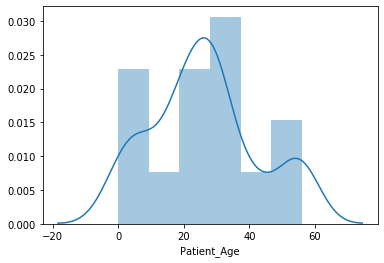

In [29]:
sns.distplot(pharma_data[pharma_data['Treated_with_drugs'] == 'DX1 DX2 DX3 DX5']['Patient_Age'])

In [30]:
pharma_data[pharma_data['Treated_with_drugs'] == 'DX1 DX2 DX3 DX5']['Patient_Age'].value_counts()

28    2
30    1
26    1
56    1
54    1
20    1
19    1
18    1
5     1
42    1
8     1
32    1
0     1
Name: Patient_Age, dtype: int64

In [31]:
Q_1 = pharma_data[pharma_data['Treated_with_drugs'] == 'DX1 DX2 DX3 DX5']['Patient_Age'].quantile(0.25)
Q_3 = pharma_data[pharma_data['Treated_with_drugs'] == 'DX1 DX2 DX3 DX5']['Patient_Age'].quantile(0.75)
IQR_2 = Q_3 - Q_1
print(IQR_2)

13.25


In [32]:
Q_3

31.5

In [33]:
dx1_2_3_5_median = np.round(pharma_data[pharma_data['Treated_with_drugs'] == 'DX1 DX2 DX3 DX5']['Patient_Age'].median())

In [34]:
dx1_2_3_5_median

27.0

In [35]:
def outlier_fun2(cols):
    d = cols[0]
    p = cols[1]
    print(d)
    print(p)
    if d == 'DX1 DX2 DX3 DX5':
        if p < (Q_1 - 1.5 * IQR_2):
            return 27
        if p > (Q_3 + 1.5 * IQR_2):
            return 27
        else:
            return p
    else:
        return p

pharma_data['Patient_Age'] = pharma_data[['Treated_with_drugs','Patient_Age']].apply(outlier_fun2, axis =1)

DX6
56
DX2
36
DX6
48
DX1
5
DX6
33
DX6
47
DX3
53
DX5
3
DX4
62
DX6
46
DX6
60
DX6
26
DX5
41
DX5
23
DX1
22
DX6
62
DX5
58
DX6
28
DX6
15
DX3
22
DX1
60
DX6
3
DX6
2
DX6
42
DX2 DX5
29
DX6
31
DX6
14
DX2
44
DX2 DX3
16
DX5
19
DX2
11
DX3
29
DX5
58
DX2
40
DX4
62
DX6
31
DX1
4
DX1 DX3
26
DX1
29
DX1
58
DX6
54
DX2 DX5
12
DX6
60
DX4
37
DX3
43
DX6
62
DX6
23
DX2
64
DX5
19
DX6
11
DX6
37
DX3
2
DX6
43
DX1 DX2
40
DX3 DX4
12
DX1 DX4
19
DX1 DX3
7
DX3
52
DX2
31
DX6
31
DX6
24
DX3
6
DX6
32
DX6
4
DX3
65
DX1 DX5
37
DX6
59
DX6
55
DX2 DX4 DX5
41
DX5
50
DX2 DX5
65
DX6
44
DX1 DX2 DX3
11
DX5
13
DX6
66
DX1 DX5
40
DX4
41
DX6
15
DX1 DX3
59
DX3
42
DX3
29
DX1 DX2
37
DX6
14
DX3
65
DX2
44
DX6
60
DX1 DX4
41
DX3 DX5
15
DX3
17
DX3 DX5
7
DX6
26
DX6
62
DX2
48
DX4
66
DX6
39
DX6
47
DX6
53
DX2
49
DX2
32
DX2
46
DX1 DX4
37
DX1
66
DX1
64
DX2 DX5
33
DX2 DX4
41
DX4
41
DX1
52
DX5
13
DX3 DX4 DX5
12
DX6
44
DX6
11
DX3
66
DX3
51
DX6
35
DX3
64
DX2 DX4
9
DX5
4
DX2
41
DX2 DX5
30
DX6
41
DX2 DX4
44
DX6
18
DX6
41
DX6
53
DX6
44
DX2
33
DX2 DX4
57
DX1 DX5

28
DX1
3
DX4
31
DX6
47
DX6
32
DX1 DX5
50
DX6
19
DX6
28
DX6
34
DX1
33
DX6
66
DX6
29
DX6
54
DX6
22
DX2 DX5
57
DX3
15
DX6
33
DX3
64
DX6
36
DX6
2
DX6
26
DX1
19
DX6
7
DX5
28
DX2
28
DX2 DX3 DX4
25
DX3
47
DX6
55
DX1
32
DX6
60
DX1 DX5
33
DX2 DX3
55
DX2
61
DX6
21
DX2 DX3
4
DX1 DX2
6
DX1
59
DX5
53
DX6
6
DX6
37
DX6
55
DX4 DX5
52
DX6
38
DX6
21
DX4
20
DX6
57
DX1 DX2 DX3 DX5
54
DX6
42
DX5
35
DX6
21
DX1
55
DX3
46
DX1 DX3 DX5
7
DX6
55
DX6
61
DX6
30
DX1 DX3 DX4
21
DX6
48
DX1
15
DX2
24
DX4
38
DX6
15
DX6
23
DX5
47
DX4
65
DX2
25
DX4
25
DX1 DX4
6
DX6
63
DX6
27
DX3 DX5
58
DX5
1
DX1
17
DX6
16
DX2 DX5
25
DX6
23
DX3 DX5
56
DX2 DX3
13
DX6
15
DX6
61
DX6
43
DX3
9
DX6
6
DX6
63
DX6
54
DX5
34
DX6
39
DX6
43
DX3
30
DX6
31
DX1 DX3
32
DX5
30
DX3
64
DX1
20
DX4
26
DX6
36
DX6
44
DX6
28
DX3 DX4 DX5
56
DX6
66
DX5
27
DX6
54
DX2
14
DX6
66
DX4
34
DX6
52
DX2 DX5
13
DX1 DX4
21
DX6
3
DX6
11
DX6
22
DX3 DX5
47
DX6
8
DX4
66
DX5
9
DX1
31
DX3
34
DX1
57
DX6
31
DX6
60
DX6
26
DX6
10
DX6
65
DX6
12
DX6
45
DX1
61
DX6
29
DX6
27
DX6
2
DX6
37
D

DX4
54
DX6
25
DX1 DX4
30
DX2
32
DX4
22
DX2
40
DX2 DX4
22
DX3 DX5
5
DX6
64
DX6
35
DX1 DX3
40
DX1
49
DX2
22
DX6
26
DX4 DX5
45
DX5
28
DX6
55
DX1
56
DX5
50
DX5
54
DX1
9
DX1
59
DX3
34
DX2 DX4
27
DX3
58
DX6
36
DX6
12
DX6
58
DX1 DX5
60
DX6
23
DX2
28
DX4
32
DX4
35
DX3 DX4
44
DX6
20
DX6
29
DX3
16
DX4
24
DX3
2
DX6
62
DX6
16
DX5
1
DX1 DX2
45
DX6
4
DX4 DX5
34
DX5
61
DX6
19
DX6
13
DX6
35
DX5
22
DX6
4
DX4
3
DX4
23
DX3 DX5
9
DX6
21
DX1 DX5
62
DX5
59
DX2
6
DX3
0
DX5
23
DX5
59
DX3 DX5
20
DX1 DX5
41
DX5
41
DX6
66
DX4 DX5
47
DX6
12
DX3 DX5
10
DX2 DX4
49
DX1
32
DX4
47
DX3
38
DX4
30
DX6
13
DX6
21
DX2 DX3
41
DX6
65
DX6
19
DX5
13
DX3 DX4 DX5
60
DX3
9
DX3
39
DX2
45
DX1
27
DX1 DX3
55
DX6
25
DX3 DX4
19
DX3
31
DX6
46
DX6
23
DX6
20
DX6
57
DX6
6
DX6
62
DX1 DX3 DX4
40
DX3
15
DX2 DX5
42
DX6
35
DX1
49
DX6
24
DX1
37
DX6
59
DX6
62
DX2
39
DX6
29
DX5
46
DX6
17
DX6
41
DX6
61
DX6
55
DX2
33
DX3 DX4
42
DX6
33
DX1 DX4
66
DX1
4
DX1
15
DX5
20
DX3
62
DX3
56
DX2 DX4
51
DX2 DX5
13
DX1 DX3
51
DX4 DX5
51
DX3
31
DX1 DX2 DX5
47
DX4
0


DX5
21
DX2 DX4
12
DX6
55
DX5
30
DX1
56
DX2
16
DX6
30
DX5
35
DX6
32
DX4
28
DX6
6
DX6
3
DX5
37
DX3
6
DX6
29
DX6
16
DX2 DX4
47
DX1 DX3
29
DX6
20
DX2 DX4
44
DX6
51
DX5
48
DX1 DX2 DX4
55
DX6
49
DX3
56
DX6
65
DX1 DX4 DX5
15
DX3 DX4
63
DX1 DX4
31
DX4
60
DX4
36
DX6
2
DX2 DX5
51
DX6
50
DX6
0
DX5
0
DX2
58
DX3
8
DX1 DX3
64
DX1 DX3
26
DX4 DX5
13
DX2 DX4
13
DX3 DX4
24
DX6
49
DX1
24
DX6
57
DX6
16
DX3
29
DX6
42
DX6
1
DX2
28
DX6
24
DX1 DX5
58
DX6
13
DX6
44
DX6
63
DX6
36
DX6
48
DX2 DX3
50
DX4
17
DX2 DX5
19
DX6
61
DX1 DX4
50
DX2 DX5
57
DX2 DX5
22
DX1 DX2 DX5
58
DX1 DX3
18
DX6
57
DX1
1
DX3
34
DX6
26
DX2
49
DX1 DX2
46
DX2
20
DX2
28
DX1
33
DX5
30
DX3
47
DX2
13
DX1 DX5
43
DX6
35
DX2 DX3
19
DX1 DX4
66
DX3
59
DX6
19
DX6
58
DX6
13
DX6
24
DX6
54
DX4
33
DX6
65
DX5
42
DX1
58
DX6
36
DX5
38
DX3 DX4
21
DX6
50
DX6
39
DX4 DX5
15
DX2 DX3
26
DX2
31
DX6
48
DX6
43
DX6
51
DX6
25
DX1
28
DX6
11
DX4
43
DX5
30
DX1 DX5
56
DX4
30
DX6
29
DX4
55
DX4
52
DX4
64
DX5
5
DX6
31
DX6
37
DX3
54
DX2
14
DX2
47
DX6
12
DX6
54
DX3 DX4
11
DX3
52

10
DX6
5
DX6
13
DX6
45
DX6
53
DX6
45
DX1
20
DX1
24
DX2 DX3 DX5
4
DX6
45
DX3
47
DX6
25
DX6
7
DX6
8
DX1 DX4
36
DX6
62
DX4
46
DX6
11
DX2
51
DX4
29
DX2 DX5
2
DX5
50
DX1 DX2 DX3 DX4
10
DX5
26
DX6
50
DX6
2
DX6
40
DX2 DX5
57
DX2
3
DX6
16
DX6
65
DX6
26
DX5
31
DX2
64
DX6
40
DX1 DX4
50
DX3 DX4
5
DX6
58
DX2 DX3 DX5
34
DX6
61
DX2
4
DX4
61
DX6
35
DX3 DX5
57
DX1
26
DX2 DX3
46
DX2
33
DX2
42
DX1
57
DX4
42
DX4
25
DX6
15
DX6
61
DX6
0
DX6
23
DX4
38
DX2
58
DX1
4
DX6
2
DX1
24
DX6
41
DX4
36
DX6
23
DX1 DX2 DX4
52
DX2
56
DX3
8
DX6
55
DX6
66
DX1
46
DX5
4
DX4
55
DX1
24
DX2
3
DX2 DX4 DX5
33
DX1 DX4
45
DX1
53
DX4 DX5
49
DX6
59
DX1 DX2
21
DX4
0
DX6
32
DX6
49
DX4
19
DX1 DX2
9
DX1
26
DX1
15
DX4
59
DX1 DX5
47
DX6
7
DX2 DX3 DX4
15
DX3
14
DX1 DX3 DX4
24
DX6
10
DX1 DX2 DX3
8
DX2
46
DX6
54
DX6
43
DX1 DX2
6
DX1
49
DX1 DX2
16
DX2
61
DX1 DX2 DX4
29
DX1 DX5
34
DX2
40
DX6
65
DX3
33
DX6
49
DX1
28
DX1 DX5
44
DX1
55
DX5
24
DX4 DX5
10
DX6
29
DX6
45
DX1 DX4
24
DX2
40
DX4 DX5
61
DX4
34
DX6
49
DX2 DX4 DX5
56
DX2
8
DX5
23
DX2 DX3
20


32
DX6
10
DX1 DX2 DX5
64
DX5
47
DX3
62
DX2
35
DX3
19
DX6
6
DX5
13
DX3 DX5
51
DX6
37
DX6
37
DX3
9
DX1 DX2 DX4
38
DX1
66
DX5
10
DX6
28
DX6
46
DX6
29
DX6
32
DX5
58
DX6
61
DX6
31
DX2 DX5
57
DX4
32
DX5
62
DX2
14
DX6
22
DX2
27
DX4
12
DX1 DX2
23
DX1
52
DX6
62
DX2
2
DX5
55
DX3
63
DX4 DX5
52
DX6
51
DX5
63
DX6
12
DX2
2
DX4
55
DX6
10
DX6
49
DX2 DX4
3
DX3
3
DX2
44
DX2
62
DX3 DX4
26
DX6
0
DX6
4
DX5
65
DX2 DX5
20
DX6
61
DX5
32
DX6
4
DX1 DX2 DX3
54
DX3
63
DX2 DX5
2
DX1
22
DX3 DX5
43
DX3
22
DX6
61
DX4 DX5
32
DX3
47
DX6
19
DX6
20
DX3
64
DX6
37
DX3
29
DX2
61
DX6
62
DX6
31
DX4
65
DX1 DX2 DX5
27
DX2
2
DX6
7
DX2 DX5
21
DX1
42
DX6
38
DX4
57
DX6
37
DX6
32
DX6
4
DX6
0
DX6
44
DX3
64
DX5
65
DX1
24
DX6
33
DX6
37
DX2 DX3
0
DX6
10
DX1
18
DX5
58
DX1 DX5
23
DX4
65
DX1 DX2
56
DX6
24
DX1 DX3
64
DX6
7
DX6
65
DX6
5
DX6
47
DX6
61
DX6
12
DX4 DX5
13
DX2 DX4 DX5
39
DX4
1
DX3
21
DX2 DX3 DX4
62
DX4
39
DX6
51
DX1 DX3
17
DX1 DX4
31
DX3
21
DX1 DX2
40
DX6
37
DX2 DX5
61
DX6
29
DX6
6
DX6
53
DX2 DX5
2
DX6
40
DX2 DX3 DX5
58
DX5
57
DX

DX6
61
DX4
52
DX3
12
DX6
58
DX4
10
DX6
8
DX2 DX4
51
DX4
32
DX2
16
DX1
0
DX2
19
DX1 DX4
48
DX2 DX4
25
DX1 DX3
32
DX6
28
DX5
4
DX6
60
DX5
62
DX4 DX5
44
DX6
53
DX3
10
DX3
26
DX6
24
DX2 DX4 DX5
36
DX6
56
DX2
47
DX5
24
DX4
26
DX6
24
DX6
51
DX3
4
DX3 DX4
22
DX1 DX3 DX5
57
DX4
3
DX6
51
DX6
38
DX6
64
DX3
31
DX6
31
DX6
12
DX3 DX5
41
DX4
21
DX2
44
DX6
5
DX6
41
DX2 DX3
13
DX4
25
DX6
43
DX1 DX5
57
DX5
32
DX1 DX3
50
DX5
2
DX6
38
DX1
23
DX1 DX3
31
DX4
3
DX1
38
DX2 DX3
3
DX3
55
DX2
47
DX6
55
DX6
10
DX2 DX5
22
DX5
2
DX3 DX5
34
DX1 DX3
47
DX6
3
DX5
54
DX6
31
DX2 DX3 DX4
7
DX3
22
DX6
36
DX3
55
DX6
38
DX3
52
DX6
3
DX2 DX4
54
DX6
58
DX6
12
DX6
34
DX6
7
DX1
63
DX2 DX3
8
DX6
58
DX3
39
DX1
59
DX1 DX3
45
DX4
7
DX6
48
DX6
57
DX2 DX3 DX5
56
DX2
18
DX6
25
DX2 DX4
4
DX6
10
DX4
27
DX1
59
DX6
7
DX6
35
DX6
24
DX2 DX5
66
DX3
46
DX6
17
DX3
55
DX1 DX4
0
DX6
58
DX2 DX3 DX5
62
DX3
1
DX2 DX3
63
DX6
50
DX5
17
DX6
43
DX1 DX3
19
DX1
51
DX6
27
DX6
29
DX3
29
DX2
11
DX3
66
DX6
17
DX2 DX5
58
DX6
1
DX6
5
DX1 DX3
8
DX1 DX4 DX5
37


DX1
52
DX6
64
DX1 DX5
11
DX5
46
DX5
36
DX6
56
DX6
26
DX4
43
DX5
53
DX5
64
DX2 DX3
51
DX6
46
DX3
18
DX1 DX2 DX5
30
DX4
56
DX2
18
DX5
10
DX3
6
DX2
16
DX4 DX5
34
DX1
40
DX1 DX2 DX4
51
DX6
17
DX6
59
DX1 DX2
21
DX6
54
DX6
13
DX6
12
DX6
6
DX6
56
DX1 DX2 DX3
54
DX6
20
DX3
58
DX1
43
DX1
41
DX2
64
DX1
16
DX6
49
DX1 DX5
31
DX6
10
DX2
51
DX2
49
DX1 DX5
63
DX5
19
DX1
38
DX1 DX3
55
DX6
31
DX6
47
DX1
18
DX6
14
DX6
24
DX1 DX4 DX5
23
DX6
26
DX4
43
DX4
29
DX6
13
DX4 DX5
64
DX4
26
DX6
35
DX1
56
DX6
10
DX4 DX5
49
DX6
32
DX6
57
DX6
36
DX6
3
DX5
39
DX6
29
DX3
51
DX6
46
DX2 DX3
18
DX6
43
DX1 DX2
31
DX1
20
DX6
4
DX2
23
DX1 DX4
61
DX6
0
DX3
16
DX6
59
DX6
47
DX6
46
DX3 DX4
42
DX6
55
DX3 DX5
59
DX6
66
DX3
61
DX4 DX5
2
DX5
59
DX3
22
DX3 DX4
54
DX6
45
DX6
14
DX2 DX5
43
DX2
57
DX1
28
DX6
30
DX4
54
DX3
8
DX5
22
DX5
23
DX5
14
DX6
42
DX5
63
DX3 DX4
53
DX5
9
DX1
31
DX1 DX3
32
DX2
59
DX6
6
DX6
38
DX6
63
DX3
63
DX1
25
DX6
63
DX6
19
DX3 DX4 DX5
62
DX6
64
DX3
30
DX6
58
DX6
37
DX5
9
DX4
46
DX2 DX3
43
DX1
10
DX6
27
DX6
20
D

61
DX6
60
DX2 DX3
18
DX1 DX5
66
DX2
57
DX6
8
DX1 DX2 DX3 DX4
49
DX3
42
DX5
7
DX6
43
DX4
5
DX6
38
DX4
50
DX2
22
DX1 DX2 DX4 DX5
3
DX6
18
DX5
1
DX6
21
DX3 DX5
41
DX6
31
DX6
4
DX1
34
DX5
30
DX6
27
DX6
35
DX2 DX4
26
DX4
30
DX4
51
DX6
19
DX6
35
DX1
47
DX6
43
DX6
56
DX6
62
DX1 DX5
0
DX6
4
DX1
50
DX5
43
DX6
36
DX6
12
DX2
20
DX4
2
DX6
4
DX4
46
DX6
27
DX6
55
DX3
40
DX1
48
DX1
66
DX6
25
DX6
16
DX3
5
DX6
25
DX2 DX5
17
DX1 DX3
54
DX6
13
DX1
11
DX1 DX4
9
DX4
36
DX1 DX4
51
DX6
66
DX4
43
DX4
29
DX3 DX4
59
DX6
60
DX3
6
DX1
66
DX4
21
DX1 DX4 DX5
4
DX4 DX5
51
DX5
65
DX5
11
DX6
21
DX2 DX3
39
DX6
38
DX6
53
DX3 DX4
28
DX6
9
DX2 DX3 DX4 DX5
12
DX2 DX4
57
DX2 DX5
57
DX6
36
DX4
15
DX2 DX4
15
DX1
30
DX6
55
DX1
44
DX3 DX5
22
DX4
62
DX4
20
DX1 DX2 DX3 DX5
42
DX1 DX4
5
DX2 DX4
45
DX6
39
DX6
56
DX6
48
DX2 DX3
41
DX6
35
DX5
36
DX4
31
DX1 DX2 DX5
57
DX1
42
DX6
23
DX6
59
DX5
13
DX6
26
DX2 DX3 DX5
20
DX6
53
DX3
6
DX6
7
DX6
36
DX6
13
DX5
56
DX5
62
DX6
34
DX6
8
DX5
6
DX6
53
DX3
16
DX6
23
DX1
35
DX6
38
DX6
15
DX6
41
DX5


DX5
47
DX6
15
DX1 DX2
34
DX2
31
DX4
46
DX2
59
DX2
35
DX1 DX4 DX5
31
DX2 DX4 DX5
34
DX4
64
DX3
52
DX2 DX3
23
DX3 DX4
7
DX6
34
DX6
64
DX3
31
DX6
62
DX6
52
DX5
40
DX2
6
DX2
21
DX6
2
DX3
6
DX2
61
DX4 DX5
8
DX3
7
DX3
2
DX2 DX3 DX5
56
DX1 DX3
47
DX6
2
DX5
37
DX1 DX3
6
DX3
24
DX6
31
DX5
50
DX3
21
DX6
63
DX5
5
DX1 DX4 DX5
10
DX6
8
DX6
13
DX6
38
DX3
44
DX3
0
DX5
6
DX6
41
DX3
65
DX6
25
DX5
0
DX2
34
DX1 DX2
26
DX2
57
DX6
21
DX3
27
DX6
31
DX6
61
DX1
25
DX3
9
DX6
31
DX6
16
DX3
57
DX3
13
DX3
1
DX1 DX4 DX5
19
DX6
18
DX3 DX5
11
DX1
65
DX4
47
DX3
66
DX6
59
DX6
60
DX2
53
DX1
16
DX3
23
DX4
20
DX6
41
DX1 DX3
19
DX2
24
DX3 DX4 DX5
60
DX6
59
DX6
14
DX1 DX2 DX5
28
DX6
13
DX6
44
DX1
58
DX1 DX3
62
DX1 DX2
19
DX6
58
DX6
38
DX4
54
DX1 DX4
23
DX6
52
DX5
13
DX3
14
DX2 DX3
38
DX5
34
DX3
8
DX1 DX2
15
DX4 DX5
25
DX5
1
DX6
46
DX6
7
DX5
44
DX3
13
DX1 DX4
0
DX4 DX5
42
DX5
7
DX6
8
DX5
39
DX3
3
DX2 DX5
6
DX2 DX3 DX5
38
DX6
57
DX1 DX5
12
DX3
18
DX2 DX3
63
DX3 DX5
33
DX6
44
DX2 DX3 DX5
66
DX2
58
DX1 DX5
27
DX1 DX5
61
DX1
44

DX3
37
DX2 DX3 DX5
10
DX4
52
DX1 DX3
2
DX4 DX5
13
DX5
33
DX2 DX3
14
DX2 DX5
53
DX5
7
DX3
47
DX3
33
DX5
31
DX6
33
DX5
12
DX3 DX4
28
DX4
31
DX3
46
DX3
14
DX5
8
DX3
8
DX6
1
DX5
57
DX4 DX5
10
DX6
33
DX1
1
DX5
56
DX3
4
DX3
23
DX4
29
DX2 DX3
36
DX6
51
DX6
3
DX2
55
DX1
66
DX6
62
DX4
65
DX2
62
DX6
40
DX5
40
DX5
14
DX6
20
DX6
62
DX6
37
DX5
29
DX2
7
DX6
29
DX6
59
DX6
46
DX3
0
DX4
36
DX4
64
DX6
2
DX6
45
DX6
17
DX3 DX4 DX5
61
DX2 DX5
31
DX6
9
DX6
40
DX6
39
DX6
53
DX6
32
DX3
47
DX1
5
DX6
26
DX3
53
DX1 DX3
41
DX6
1
DX3 DX4
36
DX2
12
DX6
24
DX6
27
DX2 DX3
58
DX6
20
DX2 DX4
50
DX5
34
DX4
55
DX3
36
DX2 DX3
47
DX4
39
DX2
9
DX5
10
DX5
58
DX2 DX3
26
DX6
22
DX3
20
DX6
21
DX6
3
DX2
65
DX6
27
DX3
17
DX5
45
DX3
47
DX3
30
DX6
34
DX6
37
DX4
22
DX3
35
DX6
10
DX3 DX4
58
DX3
40
DX3
32
DX1
46
DX6
37
DX1
32
DX4 DX5
25
DX2
57
DX6
6
DX4
57
DX3
42
DX6
36
DX6
61
DX6
0
DX3
40
DX3 DX5
29
DX3
26
DX6
53
DX1
5
DX1
19
DX1 DX3
13
DX5
53
DX6
0
DX6
56
DX2
18
DX1
44
DX3
15
DX2
55
DX6
14
DX5
57
DX5
59
DX5
53
DX5
16
DX6
3
DX1
48
DX

DX5
10
DX4
28
DX6
24
DX3 DX5
49
DX4
48
DX6
31
DX5
8
DX5
10
DX4
30
DX5
28
DX2
60
DX4 DX5
64
DX1 DX4
27
DX6
34
DX1
5
DX2
22
DX4
45
DX2
60
DX5
27
DX6
59
DX2
34
DX1 DX3
61
DX6
6
DX6
26
DX4
64
DX6
63
DX6
2
DX6
43
DX1
46
DX6
48
DX3 DX5
13
DX4
48
DX6
51
DX2 DX4
3
DX3
5
DX6
23
DX6
61
DX4
42
DX6
57
DX6
16
DX1
45
DX1
43
DX1
21
DX2 DX5
39
DX6
14
DX1 DX5
49
DX2
28
DX1 DX5
58
DX2 DX3
47
DX3
24
DX2 DX3
54
DX2
64
DX3 DX4
45
DX2 DX4 DX5
39
DX1 DX2
54
DX1
0
DX1 DX3
14
DX4
42
DX1 DX4
59
DX6
46
DX1
31
DX6
18
DX6
61
DX5
61
DX6
49
DX5
45
DX1 DX3 DX5
53
DX1 DX3
28
DX4
64
DX5
34
DX6
41
DX6
56
DX4 DX5
5
DX5
42
DX1
49
DX1 DX2 DX5
61
DX1 DX2 DX4 DX5
21
DX2 DX3 DX5
19
DX1 DX5
13
DX3 DX5
48
DX1 DX2
7
DX6
11
DX2
2
DX2
58
DX6
44
DX1 DX5
37
DX1 DX4 DX5
7
DX6
29
DX6
7
DX5
19
DX5
59
DX5
11
DX6
42
DX6
58
DX1 DX5
18
DX2
58
DX6
18
DX6
46
DX6
62
DX2 DX3
21
DX1
34
DX5
26
DX3 DX5
49
DX6
22
DX6
2
DX2 DX4 DX5
54
DX6
14
DX4 DX5
13
DX3
61
DX1
40
DX6
30
DX6
29
DX5
55
DX6
13
DX6
53
DX6
53
DX1
31
DX6
13
DX6
50
DX1 DX3
52
DX5
58
DX

DX1
33
DX4
20
DX6
16
DX6
40
DX6
0
DX6
11
DX3
51
DX6
23
DX1
30
DX6
21
DX2
38
DX6
41
DX4
47
DX3
0
DX2
49
DX6
23
DX4
16
DX6
46
DX1
54
DX6
25
DX6
5
DX5
19
DX3 DX4
42
DX4
61
DX2
24
DX6
32
DX2
55
DX6
5
DX4
63
DX6
24
DX1 DX2 DX5
62
DX1
33
DX6
48
DX2
33
DX4
33
DX1 DX4
1
DX1 DX3
9
DX3
0
DX6
45
DX3
14
DX6
7
DX1
52
DX2 DX5
56
DX5
48
DX3
19
DX6
57
DX1
49
DX3 DX5
50
DX6
46
DX2 DX4
39
DX6
43
DX1
36
DX6
62
DX6
38
DX6
66
DX6
27
DX6
9
DX1 DX3
25
DX2
45
DX1 DX4
27
DX6
13
DX3
58
DX2 DX4 DX5
45
DX1 DX5
19
DX2
7
DX4
11
DX6
52
DX2 DX3
39
DX3
10
DX5
9
DX6
0
DX3 DX5
44
DX4
14
DX6
51
DX1 DX2 DX3
64
DX6
26
DX2 DX3
20
DX4
57
DX2
22
DX6
22
DX6
48
DX2 DX3
28
DX6
45
DX6
2
DX1 DX2
28
DX2
22
DX6
18
DX3
1
DX4
4
DX6
21
DX3
50
DX1
59
DX2 DX3
59
DX1
39
DX4
66
DX6
26
DX2
23
DX4
51
DX6
0
DX6
53
DX6
27
DX4
44
DX1
5
DX4
51
DX3
54
DX1 DX2 DX3 DX4
26
DX4
0
DX6
27
DX4
43
DX4
57
DX6
1
DX6
13
DX2
16
DX1 DX5
47
DX3 DX4
30
DX6
34
DX2
8
DX1 DX3 DX5
54
DX6
32
DX2 DX5
2
DX2
0
DX4 DX5
43
DX2
33
DX6
32
DX6
7
DX2
45
DX6
41
DX5
4
DX6
41
D

6
DX4 DX5
42
DX5
13
DX6
34
DX4
63
DX6
54
DX6
2
DX2 DX3
60
DX5
31
DX1 DX3 DX4 DX5
21
DX1 DX2
16
DX4
28
DX1
65
DX1
0
DX2 DX5
26
DX5
49
DX2
11
DX6
62
DX6
45
DX6
39
DX3 DX5
15
DX1
40
DX6
26
DX6
35
DX1
52
DX2 DX3 DX4
30
DX1 DX4 DX5
2
DX1 DX3
16
DX4
28
DX3
22
DX5
26
DX1
66
DX1 DX2
34
DX1 DX5
12
DX3 DX5
19
DX1 DX5
4
DX6
9
DX1 DX2
49
DX1 DX4
62
DX1
59
DX6
30
DX5
2
DX6
12
DX2 DX3 DX5
40
DX2 DX4
63
DX1
33
DX6
62
DX1
27
DX6
21
DX3
43
DX2
25
DX3
56
DX2 DX5
8
DX6
31
DX1
58
DX4 DX5
42
DX6
0
DX6
33
DX1
11
DX4
24
DX6
14
DX1 DX3
62
DX5
7
DX4
26
DX4
44
DX6
11
DX6
23
DX4
64
DX1 DX2 DX4
44
DX6
40
DX6
8
DX2 DX5
5
DX4
29
DX5
0
DX3 DX4
43
DX6
46
DX6
66
DX3
2
DX5
46
DX6
24
DX6
21
DX6
44
DX4
15
DX4
38
DX6
43
DX6
42
DX1
7
DX2 DX4
17
DX3 DX4 DX5
22
DX4
43
DX4
46
DX6
1
DX5
53
DX6
43
DX1 DX4
3
DX6
19
DX5
49
DX2 DX3
39
DX6
28
DX5
65
DX1 DX2
53
DX6
26
DX6
34
DX6
12
DX4 DX5
26
DX5
14
DX3
37
DX6
25
DX1
7
DX6
31
DX6
49
DX1 DX3
29
DX1
19
DX2
33
DX6
15
DX1 DX5
50
DX6
26
DX1
29
DX4 DX5
62
DX6
30
DX1
31
DX6
52
DX6
19
DX1
6

DX4
5
DX6
57
DX4
37
DX6
36
DX2 DX5
5
DX6
46
DX6
54
DX6
23
DX6
47
DX3 DX4
40
DX5
61
DX5
62
DX2 DX5
58
DX4 DX5
3
DX4
58
DX6
35
DX3 DX5
9
DX3 DX4
22
DX3
6
DX4
36
DX2 DX3 DX4
30
DX6
29
DX3
66
DX1
21
DX4
44
DX6
2
DX6
43
DX2
50
DX4
66
DX5
64
DX1 DX2 DX3
1
DX6
60
DX3 DX4 DX5
55
DX3
24
DX2 DX3 DX5
28
DX6
7
DX6
63
DX2 DX4
49
DX4
32
DX1 DX2
63
DX2 DX5
52
DX3
51
DX1
64
DX1
49
DX6
62
DX4
12
DX1 DX4
65
DX5
60
DX3
47
DX5
64
DX2 DX3
60
DX3
50
DX2 DX3
9
DX1
14
DX2
41
DX2 DX3
57
DX1
4
DX4
34
DX6
7
DX6
20
DX3 DX4
15
DX2
57
DX4
48
DX6
31
DX1 DX3 DX4
16
DX1
45
DX3
60
DX3 DX4
21
DX2 DX3
30
DX2
49
DX3 DX4
5
DX1
39
DX4 DX5
23
DX6
60
DX6
13
DX6
62
DX3
41
DX6
61
DX1
29
DX1
11
DX2
0
DX6
17
DX6
56
DX6
1
DX3 DX4
41
DX1 DX5
66
DX3
33
DX1 DX4
56
DX6
13
DX6
7
DX3
14
DX1 DX4
18
DX6
61
DX1 DX4
20
DX3
59
DX3
31
DX6
41
DX2 DX3
6
DX3 DX4
63
DX1
64
DX6
7
DX6
29
DX6
21
DX1 DX5
39
DX3
37
DX3
18
DX1 DX2 DX3
36
DX1 DX3
61
DX2 DX3
56
DX6
12
DX3
54
DX3 DX4
14
DX6
58
DX2
62
DX3
59
DX6
26
DX1
34
DX6
1
DX6
35
DX2 DX4
43
DX6
30
DX6

DX3
62
DX6
60
DX2 DX3 DX4 DX5
36
DX6
60
DX5
55
DX6
36
DX6
63
DX6
39
DX6
37
DX5
37
DX3
59
DX2
54
DX6
25
DX2 DX4
58
DX1 DX5
6
DX6
43
DX6
31
DX1
39
DX6
11
DX1
49
DX1 DX2
58
DX6
39
DX6
58
DX6
8
DX6
15
DX2
60
DX3
16
DX5
61
DX1 DX4
23
DX3
18
DX6
29
DX3
63
DX6
24
DX3
47
DX3
38
DX1
14
DX6
27
DX6
61
DX6
6
DX4
27
DX2
3
DX4
26
DX1 DX3
37
DX5
51
DX6
26
DX3 DX4
60
DX6
49
DX6
12
DX1 DX4
22
DX2
4
DX6
12
DX6
21
DX6
12
DX6
0
DX6
38
DX1
2
DX6
23
DX2
1
DX2
42
DX4
30
DX6
4
DX6
2
DX6
24
DX1 DX2
33
DX3 DX5
54
DX6
15
DX2
29
DX6
38
DX6
56
DX1
63
DX4
38
DX3
37
DX1 DX2 DX4
37
DX1
27
DX1 DX3 DX4
8
DX6
28
DX5
49
DX6
26
DX6
59
DX6
33
DX6
16
DX6
46
DX4
61
DX6
66
DX3
10
DX3
51
DX6
35
DX6
48
DX6
56
DX1
51
DX2
37
DX4 DX5
51
DX1 DX3
22
DX6
2
DX5
63
DX5
5
DX6
31
DX6
40
DX3
3
DX1 DX3
35
DX6
45
DX6
2
DX6
2
DX6
54
DX4
62
DX1 DX2
36
DX6
30
DX4
47
DX1 DX2 DX4
53
DX6
29
DX6
29
DX3
12
DX1 DX3
16
DX6
49
DX1
18
DX5
51
DX6
38
DX4
48
DX2 DX4
41
DX3
13
DX3
23
DX2
44
DX3
44
DX1 DX2
8
DX6
63
DX6
1
DX3
32
DX6
55
DX1 DX3
10
DX2
47
DX1


28
DX2 DX4
10
DX6
2
DX5
1
DX3 DX4
51
DX1 DX4
2
DX6
0
DX6
18
DX1 DX3 DX5
64
DX6
57
DX6
4
DX6
21
DX3
49
DX6
49
DX6
31
DX1
17
DX6
51
DX4
10
DX1 DX5
55
DX3 DX5
26
DX1
52
DX2
19
DX4
28
DX6
23
DX2
58
DX3
27
DX6
1
DX6
48
DX1
64
DX6
5
DX4 DX5
38
DX3
42
DX1
0
DX1 DX3 DX4
18
DX5
39
DX3 DX4
2
DX2 DX3
38
DX2
25
DX2 DX3
13
DX4
14
DX6
8
DX6
27
DX2
3
DX1 DX2
48
DX5
51
DX2 DX3
19
DX3
36
DX6
65
DX4
51
DX6
22
DX2
41
DX5
34
DX2 DX4
28
DX4
23
DX4
19
DX6
59
DX2 DX5
48
DX6
8
DX2 DX4
49
DX6
55
DX1
40
DX6
40
DX1 DX5
48
DX4
25
DX2
33
DX6
62
DX2
13
DX2
2
DX1 DX4
10
DX2
63
DX1
53
DX2
34
DX3
7
DX2
44
DX2 DX5
20
DX1 DX5
12
DX4
35
DX5
24
DX2
10
DX1 DX4
31
DX1 DX5
34
DX4
63
DX2
19
DX6
19
DX6
40
DX2
21
DX4
56
DX5
25
DX6
39
DX6
51
DX2 DX3
24
DX6
36
DX1
32
DX1 DX4
53
DX1 DX3
56
DX2 DX3 DX4
35
DX1 DX2
39
DX1 DX2
62
DX6
22
DX4
30
DX5
25
DX5
55
DX1 DX2
42
DX1 DX2 DX4
64
DX6
2
DX6
15
DX6
30
DX3
63
DX1
28
DX6
50
DX2 DX4
66
DX3
49
DX6
34
DX4
29
DX1 DX4 DX5
56
DX6
2
DX1 DX4
48
DX3
45
DX1
37
DX6
37
DX6
52
DX6
8
DX6
54
DX1 DX2 

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

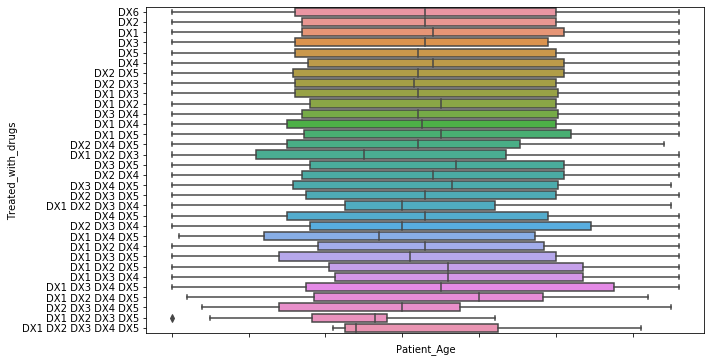

In [36]:
plt.figure(figsize = (10,6))
chart = sns.boxplot(x = 'Patient_Age', y = 'Treated_with_drugs', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

[Text(0, 0, 'URBAN'), Text(0, 0, 'RURAL')]

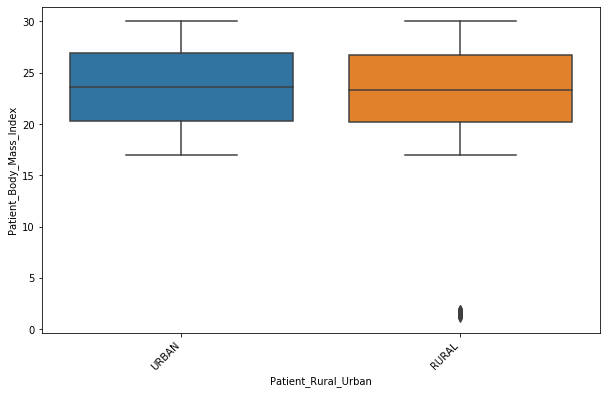

In [37]:
plt.figure(figsize = (10,6))
chart = sns.boxplot(x = 'Patient_Rural_Urban',y = 'Patient_Body_Mass_Index', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [38]:
Q1 = pharma_data[pharma_data['Patient_Rural_Urban'] == 'RURAL']['Patient_Body_Mass_Index'].quantile(0.25)
Q3 = pharma_data[pharma_data['Patient_Rural_Urban'] == 'RURAL']['Patient_Body_Mass_Index'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6.541719622171257


In [39]:
bmi_mean = np.round(pharma_data[pharma_data['Patient_Rural_Urban'] == 'RURAL']['Patient_Body_Mass_Index'].mean())

In [40]:
bmi_mean

23.0

In [41]:
def outlier_bmi(cols):
    d = cols[0]
    p = cols[1]
    print(d)
    print(p)
    if d == 'RURAL':
        if p < (Q1 - 1.5 * IQR):
            return 23
        elif p > (Q3 + 1.5 * IQR):
            return 23
        else:
            return p
    else:
        return p

pharma_data['Patient_Body_Mass_Index'] = pharma_data[['Patient_Rural_Urban','Patient_Body_Mass_Index']].apply(outlier_bmi, axis =1)

URBAN
18.47938545164161
RURAL
22.945565936823225
RURAL
27.510026961895274
URBAN
19.130975770581134
RURAL
1.3484
URBAN
26.155120154816505
RURAL
19.10324372612463
URBAN
18.126976151288968
URBAN
25.074482467702946
RURAL
17.663876903152012
URBAN
18.690567428671038
RURAL
23.96805052490239
RURAL
23.435483622912503
RURAL
17.03953597537407
URBAN
27.741954817664404
RURAL
24.55147486562707
RURAL
29.80011011770271
RURAL
23.76907871133469
RURAL
20.74282199703616
RURAL
17.63754113187127
RURAL
23.7160767639516
URBAN
20.541924294672178
RURAL
24.013432252336184
RURAL
23.06152863648439
RURAL
25.32988456817153
RURAL
22.568115096323947
RURAL
22.38088297016107
URBAN
27.93565777415705
RURAL
22.155319685669145
URBAN
29.63804746613389
RURAL
22.574984186144075
URBAN
20.723332389712567
RURAL
18.47744812380261
URBAN
25.21605546092234
RURAL
18.50053492921035
RURAL
28.16866486950201
URBAN
17.34262398850388
RURAL
22.833343769279384
URBAN
18.011733408170453
RURAL
24.90146902173387
RURAL
27.83003667004708
RURAL
20.9

RURAL
18.74854290108208
URBAN
27.72503417123249
URBAN
28.53920946379643
URBAN
20.983070331851387
RURAL
28.78216052480258
RURAL
17.420417763388702
RURAL
28.66752028535123
URBAN
28.276168261298643
RURAL
22.031536825420247
RURAL
22.948329224937826
URBAN
21.510970750231266
RURAL
21.153382629221348
URBAN
17.12318549753952
RURAL
26.18898151180607
RURAL
27.18262936023581
RURAL
29.006582586841663
RURAL
17.483737539147526
URBAN
29.608859381519913
URBAN
19.700518869797087
URBAN
27.32384016283348
RURAL
27.99747860191514
URBAN
25.120143205146174
URBAN
26.95157251697107
RURAL
18.057123970415706
RURAL
29.04356200018971
RURAL
19.761746507001067
URBAN
28.82789147838329
RURAL
23.02191503115109
URBAN
26.665712068591862
RURAL
21.3881025273475
RURAL
19.508254151823675
RURAL
29.20589275895319
RURAL
29.50046744281807
URBAN
20.129602940102032
RURAL
22.574984186144075
RURAL
23.7061530548162
RURAL
19.847895289156483
RURAL
21.26487106840468
URBAN
19.053131264010773
RURAL
19.045947769562805
RURAL
24.687973528387

RURAL
24.824119691583128
URBAN
17.832771432236246
RURAL
24.640480574068746
RURAL
21.263367001183028
URBAN
28.40362249791998
URBAN
18.84064622835359
RURAL
25.76223011947609
URBAN
26.02797358140112
RURAL
25.24950609030489
RURAL
19.990525897998268
RURAL
28.39704609341077
URBAN
25.4608533685804
RURAL
18.662265759588053
RURAL
22.40031144557833
RURAL
29.039338923013158
RURAL
19.908483235937048
RURAL
29.873916342545925
RURAL
18.91037130831397
RURAL
27.008692380848146
URBAN
19.280714954754647
URBAN
28.891371753880144
RURAL
28.277114092921252
URBAN
18.218667565374783
RURAL
22.6319568232718
RURAL
26.9077251462103
URBAN
26.846687927287913
RURAL
22.78040132687416
RURAL
28.981358196035018
RURAL
18.738067254124037
URBAN
22.728299816405052
RURAL
25.2170200668378
RURAL
29.28390952009105
RURAL
17.568012477511903
RURAL
24.053134152419748
RURAL
26.844056274225306
URBAN
24.130987462756863
RURAL
18.135090075097906
RURAL
25.463697234516072
URBAN
20.789376627704133
RURAL
20.82527976610673
RURAL
17.1338743063

RURAL
18.68080176781639
RURAL
25.02091170318248
RURAL
26.42452507464914
RURAL
20.165440694133803
RURAL
21.44120917003199
RURAL
26.480147540502127
RURAL
20.2366351412808
URBAN
22.204758663826365
RURAL
22.65059949689931
RURAL
23.076587793515763
URBAN
25.04953653170525
URBAN
20.278410073440877
RURAL
22.155351541364112
RURAL
27.73665195638682
RURAL
28.78216052480258
RURAL
29.003352506018434
RURAL
19.00286681329785
RURAL
20.50046953647846
URBAN
29.4654958539075
URBAN
28.91315928660889
RURAL
22.54495316616251
RURAL
21.04379001039881
URBAN
21.468654013547877
RURAL
18.26173596403105
RURAL
24.244051777410164
URBAN
29.9823678982712
RURAL
25.967379414197502
URBAN
23.73453466840241
RURAL
17.51778191480721
RURAL
21.805587541368475
RURAL
29.693058597735238
RURAL
24.845199699355828
URBAN
19.579673242642567
RURAL
19.512944186170927
RURAL
27.522243165704648
RURAL
26.97115226633813
URBAN
20.010266600397166
RURAL
27.23659082338037
URBAN
18.218667565374783
RURAL
26.686721253191923
URBAN
29.515519573247968

RURAL
22.259502477988974
RURAL
23.96805052490239
RURAL
20.409041560806642
RURAL
20.11920932818
RURAL
19.28217780887509
RURAL
20.88275732718569
URBAN
18.144895542079553
URBAN
17.945452837925338
URBAN
28.91315928660889
RURAL
26.011178248104812
RURAL
24.11052286525075
RURAL
21.033936740929924
RURAL
19.600601702835732
RURAL
21.313659571523228
RURAL
27.31376759450134
URBAN
19.167377066937114
RURAL
22.6992061303142
RURAL
20.3371922957122
RURAL
19.954959790109868
RURAL
26.563984836523318
URBAN
18.2363607252683
RURAL
28.684997762168692
RURAL
18.37076948606071
RURAL
21.02390563544717
RURAL
17.970702991062172
RURAL
27.917589420953284
URBAN
21.90628590802751
RURAL
27.552854928401928
URBAN
24.59742603810853
RURAL
28.165164892578826
RURAL
22.312790660416105
RURAL
21.027213555046426
RURAL
25.03191145556378
RURAL
22.20276860849401
RURAL
22.186472239422212
RURAL
21.545550281739306
URBAN
23.917984144067038
RURAL
25.458019902655096
URBAN
28.699934655643602
RURAL
20.59974397976059
RURAL
20.14711297343968

18.325973580493095
RURAL
19.948978802026406
RURAL
23.127270758245192
RURAL
20.852932323304568
RURAL
21.397123220502365
RURAL
20.52050198591609
URBAN
23.429972594065646
RURAL
24.829937680473517
RURAL
26.798104775359413
RURAL
23.490439756759482
RURAL
25.335516137571922
RURAL
25.57772619721425
RURAL
20.50349461246168
URBAN
25.077451810175372
RURAL
27.61996139735033
URBAN
21.15318193950911
URBAN
23.90426946161387
RURAL
28.14435723867345
RURAL
28.230774194788605
URBAN
27.161977400262913
URBAN
24.840034948846107
RURAL
20.35822916880188
RURAL
20.4895897134891
RURAL
22.806748827124
URBAN
29.41265644434781
URBAN
28.03280056829361
RURAL
20.79334984197399
URBAN
18.635228881020804
RURAL
20.44545129629387
RURAL
21.456673548370787
URBAN
19.0113240320006
RURAL
27.294509592219487
RURAL
29.00990602293596
RURAL
21.343274387790032
RURAL
17.674557906857626
RURAL
26.58680013467102
URBAN
20.586044853593236
RURAL
19.012639557805386
URBAN
20.20434597780659
RURAL
27.162010922459828
URBAN
27.005011782409397
RUR

23.89729394962008
URBAN
26.33893256625989
URBAN
26.528314952374267
RURAL
20.110976976178073
RURAL
20.881317338435007
URBAN
22.0175703621676
URBAN
25.640904179665824
URBAN
25.47072423046657
RURAL
18.768133437032784
URBAN
19.700518869797087
URBAN
28.423305137664272
RURAL
22.19810561653016
RURAL
29.047017362008447
RURAL
20.97829304678356
RURAL
19.231075889822854
RURAL
25.85681792873169
RURAL
19.756226367989328
RURAL
27.778104161061183
RURAL
22.84551774923209
URBAN
24.816005332316628
RURAL
28.141336064108163
URBAN
19.378990740804475
RURAL
29.11935283494984
RURAL
23.16525009419467
RURAL
19.09749860889379
RURAL
17.12847717790157
RURAL
25.18293108328864
RURAL
25.483288114635805
RURAL
24.370830161146568
RURAL
28.331357792888106
URBAN
28.236137253976327
RURAL
27.61413912875177
RURAL
21.6842971387744
RURAL
23.81567349925553
RURAL
23.457727834862045
RURAL
28.88645009390468
URBAN
24.87440281617836
RURAL
26.680853388440376
RURAL
23.646568473418213
RURAL
26.143031094045114
URBAN
29.128713396964887
R

RURAL
20.90625514845325
URBAN
25.59217192083064
URBAN
27.74784367569009
URBAN
29.070512088881564
RURAL
21.11460295843875
RURAL
23.14324397972473
URBAN
29.45375961973879
URBAN
29.04542774802784
RURAL
23.076159312425236
RURAL
24.810433816677545
URBAN
25.7333943358421
RURAL
23.97772179107853
URBAN
29.20133108660427
URBAN
19.617528588870254
RURAL
27.187595147363623
RURAL
24.54732433715569
RURAL
20.097099668397984
RURAL
21.304478510024623
URBAN
27.377722549323455
RURAL
17.845433337849453
RURAL
18.713654993434748
RURAL
20.395961876349254
URBAN
23.78291689730635
RURAL
29.25656037747588
RURAL
19.46996724721689
RURAL
28.829848365999087
RURAL
18.744046694786586
RURAL
27.68421091286445
RURAL
27.27456641921657
RURAL
26.13266784477241
RURAL
26.62999549597004
RURAL
27.87600657619039
URBAN
21.740369845506606
RURAL
17.49180698628484
URBAN
28.92231879370073
RURAL
21.59371745706708
RURAL
18.60442291138716
URBAN
17.54795672790022
URBAN
28.30193594046454
URBAN
23.339185049239486
RURAL
24.67104972544306
RU

RURAL
25.802984294525533
RURAL
17.657980923453373
RURAL
19.053342032719744
RURAL
17.79967367871077
URBAN
19.896035063706282
RURAL
17.929369184755796
URBAN
27.324529060661355
RURAL
19.460349640924704
URBAN
27.12349557979748
URBAN
26.34850800830285
RURAL
20.796151819577165
RURAL
22.56214470514702
RURAL
18.65591036857311
RURAL
18.764623965559643
RURAL
18.538107006876885
RURAL
22.064975823471137
RURAL
29.570791440950078
RURAL
28.877581290887466
RURAL
26.75529865809535
URBAN
27.780635648845124
RURAL
21.971970870911285
RURAL
17.313669405772906
URBAN
21.37693608329237
URBAN
27.780635648845124
URBAN
26.2277994715436
URBAN
24.02196569940206
URBAN
28.30117488405937
RURAL
29.7192797551187
RURAL
20.645151681916648
URBAN
18.266371502278368
RURAL
17.517467424355686
RURAL
26.90647178108377
RURAL
22.866451030851174
RURAL
28.43660358934791
URBAN
25.612790541560067
URBAN
28.758300467574855
RURAL
22.54495316616251
URBAN
19.83330967317821
RURAL
25.539349840389303
RURAL
20.14129964043504
RURAL
27.286225657

28.886105326063642
RURAL
27.553333699782552
URBAN
26.248584417987512
URBAN
26.35295860479447
RURAL
22.149617837319788
URBAN
21.229527527159114
RURAL
25.049256153063048
RURAL
18.11327454109161
RURAL
21.43849365896201
URBAN
18.070067618615013
URBAN
24.86424680735996
URBAN
19.81670404105592
URBAN
27.83375665514109
URBAN
18.314120747629186
RURAL
24.73930466525719
URBAN
20.64183270033676
URBAN
25.481539216339048
RURAL
18.91037130831397
URBAN
17.711924901684608
RURAL
28.913709785440588
URBAN
20.565354354258265
RURAL
17.402246143577706
URBAN
21.189942208792
RURAL
24.031793323741738
RURAL
19.75730355673015
URBAN
28.697648228985273
RURAL
29.91535337586789
RURAL
27.43667087554929
RURAL
23.23666916135461
URBAN
28.219400996583207
URBAN
21.817005242884974
RURAL
27.53359643435989
RURAL
20.03609261570029
URBAN
24.39302525909844
RURAL
21.965101409406227
RURAL
18.85957159531921
URBAN
18.46756489421493
URBAN
17.905946109420267
URBAN
19.870664083533047
URBAN
29.392838633099714
RURAL
18.42410491873055
URB

18.602486976910182
URBAN
28.14115346625532
URBAN
27.772756833897553
URBAN
19.24742999467444
RURAL
27.39633373697535
URBAN
21.69935263035219
RURAL
19.94884527478865
RURAL
26.51240621943727
RURAL
19.0856267373766
RURAL
22.84760129379235
URBAN
25.342298415044237
URBAN
26.322493618717772
URBAN
29.479670558376412
RURAL
18.99085663255045
URBAN
24.720054924015216
RURAL
24.72245579296494
URBAN
19.53790805990075
RURAL
18.167720540031887
RURAL
22.58573965000863
RURAL
18.6377271729066
RURAL
26.136751413874716
URBAN
19.06421012152452
URBAN
19.867840957968085
RURAL
28.185956907684933
RURAL
26.076077898046176
RURAL
28.57197719466013
RURAL
21.586362989622955
RURAL
25.656331959236287
RURAL
18.06755738059089
RURAL
23.32946501865841
RURAL
20.18690858290339
URBAN
22.3800327718156
RURAL
17.07570484723052
RURAL
26.071939253692307
URBAN
22.034491584017914
URBAN
27.9170129633914
RURAL
22.397627651995755
RURAL
24.739214063408532
RURAL
26.847724094852733
RURAL
19.7525831095432
URBAN
28.03280056829361
RURAL
24.

RURAL
23.372392396060533
RURAL
29.931905233484866
RURAL
27.99161321441893
RURAL
24.869762499807766
URBAN
17.326446597585797
RURAL
24.785747366955746
RURAL
19.195833721466318
URBAN
21.68632614725845
RURAL
25.74072384516439
URBAN
17.455059933042236
RURAL
18.901286814566873
RURAL
23.89342703173764
RURAL
24.297237254739976
RURAL
29.103743720273126
URBAN
22.977191005603608
RURAL
28.038118156158518
RURAL
25.35115187000217
RURAL
23.57494179011525
RURAL
28.89525556238034
RURAL
20.58502935018565
RURAL
19.00782069382881
RURAL
28.596087020646824
RURAL
29.63848779480925
RURAL
24.297237254739976
RURAL
24.751321570394047
URBAN
20.06494903729783
RURAL
27.21741687747756
URBAN
20.7842786212478
RURAL
23.26809451895016
RURAL
28.869080776809486
RURAL
18.32203506508865
RURAL
28.419600463251534
RURAL
27.80585706178861
RURAL
23.024827433385248
RURAL
28.963578872821998
URBAN
23.113523093807817
RURAL
23.54934016216072
RURAL
19.332288931306266
RURAL
26.457887467195892
RURAL
23.319640747468192
RURAL
19.127941744

RURAL
21.05587510816128
URBAN
20.094437928501144
URBAN
26.50067882168967
URBAN
22.53647242612471
RURAL
20.899237347613468
RURAL
29.259145933226804
RURAL
29.06913055550487
URBAN
19.39689576864913
RURAL
28.95597075231748
RURAL
20.440025432576086
RURAL
19.28349783343574
URBAN
19.640322768379388
RURAL
28.776839479484053
RURAL
18.56164733943965
RURAL
24.23403742944377
RURAL
23.495355148839607
RURAL
26.62620545286682
URBAN
25.239994439627466
RURAL
22.061437051097435
URBAN
23.617405064754013
URBAN
29.65633421675405
RURAL
27.1282338817835
RURAL
22.607146103526983
RURAL
23.49315608299864
URBAN
26.522655925054632
RURAL
20.729447851242607
URBAN
21.909493095161466
RURAL
20.04092374486486
RURAL
22.212259297763094
URBAN
18.866979447509397
RURAL
25.99016286251985
RURAL
29.16061700872129
RURAL
28.25372859835673
RURAL
29.61044314057683
RURAL
18.544295279167105
RURAL
23.076159312425236
URBAN
18.7740945974443
RURAL
21.326130876800736
RURAL
29.651586810553695
RURAL
22.062148670830034
RURAL
29.294752145905

28.20981023956058
RURAL
20.57861063645103
RURAL
21.56816694960841
URBAN
21.510970750231266
RURAL
17.949214794428684
RURAL
22.889562864303787
URBAN
23.770965163065505
RURAL
19.32422775644602
URBAN
29.121218652090235
RURAL
21.18869331471348
RURAL
29.33102078726006
RURAL
29.97905139448185
RURAL
24.047840676330967
RURAL
29.9549558119548
URBAN
20.49898800442376
RURAL
22.568523525185594
RURAL
22.92523706476939
URBAN
23.938411784083012
URBAN
27.76249197275296
RURAL
17.829386260262027
RURAL
28.43660358934791
URBAN
21.37693608329237
RURAL
28.758171980945438
RURAL
29.435256070873322
RURAL
26.402232609681267
RURAL
24.611784822493053
RURAL
20.54301564748789
RURAL
27.149225635294517
URBAN
17.91794393243289
URBAN
20.278410073440877
RURAL
20.351797652430704
URBAN
28.298729780470207
RURAL
22.65588596842239
RURAL
26.593360154002557
RURAL
21.033218867012717
RURAL
27.95711096330998
URBAN
20.455388265331184
RURAL
23.04392981792587
RURAL
27.566050826929963
URBAN
29.438125200929914
URBAN
19.896053900032165


28.721570925024423
RURAL
17.918620035431456
RURAL
28.077126622729697
RURAL
27.903883285892
RURAL
24.75853001804508
RURAL
20.434003934800987
URBAN
17.74618639723333
RURAL
28.19766118939345
RURAL
24.941734589799253
URBAN
24.196068260142926
URBAN
20.549521913791803
RURAL
28.44937340287828
RURAL
29.59590724444909
URBAN
26.95270283728117
RURAL
23.695800212191127
RURAL
23.214487576414186
URBAN
25.68429921861039
RURAL
23.10827392457943
RURAL
24.01075896720397
RURAL
24.53600060844462
URBAN
22.91862161814368
URBAN
20.73457222595181
RURAL
24.79148096004485
RURAL
21.354355206373786
RURAL
28.44546779396259
URBAN
29.82655578229736
RURAL
20.84134745826091
RURAL
20.908005599735574
RURAL
20.09756101519618
RURAL
22.515843103910303
URBAN
17.838745225058155
RURAL
23.666100228274374
RURAL
26.127692214851
RURAL
29.93647505946949
RURAL
29.996638289204807
RURAL
28.116016720513482
RURAL
19.91514075670485
URBAN
17.096224484531355
RURAL
28.309699190085958
RURAL
28.115336288423585
RURAL
27.15506703828009
RURAL
2

URBAN
29.1701864858912
URBAN
25.8464380993291
RURAL
27.019448794112364
URBAN
23.475455743191162
URBAN
22.807923418545126
RURAL
18.41611687544669
RURAL
18.150978424312164
RURAL
29.539213716506595
URBAN
23.94963418325253
RURAL
22.07512372951529
RURAL
29.847136375972546
RURAL
22.40194416452564
RURAL
26.9200632236308
URBAN
19.8452959496128
URBAN
23.285415258305978
URBAN
19.73683380203665
RURAL
17.657980923453373
URBAN
28.758183837509993
RURAL
20.579034046809173
RURAL
24.963290046441568
RURAL
29.41570786112621
RURAL
19.325804336189663
RURAL
19.195430138970984
RURAL
18.11327454109161
RURAL
21.025964183456345
RURAL
21.90619417693023
RURAL
18.791873227750024
RURAL
23.670587381323713
RURAL
27.587970606020274
RURAL
22.797600944935326
URBAN
27.71264993944242
RURAL
24.27535252904443
RURAL
22.620265026636147
URBAN
24.12493851159889
RURAL
24.526862950526095
RURAL
21.65535489250731
URBAN
28.98168393751093
URBAN
29.77582167365469
URBAN
17.075808730984992
RURAL
29.330547397149225
URBAN
26.2714643101139

RURAL
24.84164001882437
RURAL
24.35997791481768
RURAL
29.537945535814185
RURAL
19.954959790109868
URBAN
17.150598781985007
RURAL
25.78396085031858
RURAL
20.470080596451087
RURAL
22.960050508727804
RURAL
23.442654284137287
RURAL
28.84105041156096
RURAL
22.22197989919691
URBAN
22.62175088330421
RURAL
29.608931999277463
RURAL
19.62968828864136
RURAL
21.593500934053477
RURAL
24.11052286525075
URBAN
26.492781841153
URBAN
26.068474377658
URBAN
17.56158597969126
URBAN
21.558756414247494
URBAN
18.690567428671038
RURAL
23.87973677799221
RURAL
20.31300561246669
RURAL
22.357287549675107
RURAL
27.39633373697535
RURAL
22.385107778178806
URBAN
20.516032974906604
RURAL
21.564188431181325
RURAL
17.738608093456374
RURAL
23.14324397972473
RURAL
23.00163833072855
URBAN
22.43152029188689
RURAL
24.831441092984534
RURAL
24.27842031660504
RURAL
25.36710059403385
RURAL
20.60716908467289
RURAL
24.884484294574523
URBAN
23.616616314363398
RURAL
18.60541087183273
RURAL
25.067335632116446
URBAN
18.752827891214725


29.333361738943246
URBAN
22.1167082210605
RURAL
21.78605575079781
RURAL
24.789917195771913
RURAL
21.67767205576551
URBAN
28.52756581341743
RURAL
24.34603378672498
RURAL
28.912222244740143
RURAL
20.48937640331205
RURAL
29.43677733704312
RURAL
26.48170971868389
URBAN
21.653956359376263
RURAL
25.25218323523809
RURAL
26.62620545286682
URBAN
19.671511150658574
URBAN
20.343552595819954
RURAL
18.37608062995622
RURAL
23.60561438923273
RURAL
24.639267106534
URBAN
26.15769727377769
RURAL
25.24978568863586
RURAL
17.95045801523854
RURAL
19.63650898821938
RURAL
24.148241073047647
URBAN
28.07418022387272
URBAN
27.24283989832162
URBAN
25.63347793601953
RURAL
24.48795059994124
RURAL
24.00640891068161
RURAL
22.321309173439946
RURAL
25.129420676714016
URBAN
22.753147809925512
RURAL
27.062908214961592
RURAL
25.60435514134475
RURAL
21.35025465010897
RURAL
23.900745039119144
RURAL
26.913198556141285
URBAN
27.886364521725397
RURAL
21.87625285403513
URBAN
22.239438355758615
URBAN
18.46667803967221
URBAN
18.8

17.509950454214174
RURAL
23.743120506223267
RURAL
24.20201941872959
URBAN
19.154645265363733
RURAL
21.896074923100404
RURAL
18.381239144756087
URBAN
25.92116844524282
RURAL
18.039961813925807
RURAL
24.25168366005238
RURAL
26.07777136853105
URBAN
23.682628335167397
RURAL
18.754167334419826
URBAN
24.687918378860804
RURAL
17.97236917139775
RURAL
18.79922406149587
RURAL
29.54526249239655
RURAL
18.44669443806293
RURAL
25.33385778139653
RURAL
22.356589112066224
URBAN
28.44971728676169
RURAL
29.15205230727436
RURAL
17.296231307101753
RURAL
25.39361741305684
RURAL
20.54502683752049
URBAN
18.78025855947725
RURAL
28.68285454046052
RURAL
19.698542184649177
RURAL
17.661110640454726
RURAL
20.602164862635416
URBAN
19.937493675572007
RURAL
18.42249828241679
RURAL
26.77476537820955
RURAL
18.273698420578306
RURAL
24.46803018897841
RURAL
28.90531044424056
URBAN
21.102267035152106
RURAL
28.032680769126486
RURAL
27.36174924423565
RURAL
29.333812568426715
RURAL
17.286428723004832
RURAL
21.033345887842238
R

URBAN
18.011733408170453
RURAL
19.075251959256715
URBAN
29.037705359820126
RURAL
20.61543072066583
RURAL
26.820454074665843
RURAL
19.395786278065838
RURAL
29.389838611690607
URBAN
22.495804401546888
RURAL
17.50162378005383
RURAL
23.720655816944557
RURAL
20.214881741464428
RURAL
19.585320381670734
URBAN
29.569412452564567
RURAL
23.95893059583063
RURAL
26.48486687333823
URBAN
26.420975710869023
RURAL
26.271373329284447
URBAN
17.137689041542686
RURAL
26.03571641475464
RURAL
17.134659714053225
RURAL
26.553326729610816
RURAL
23.49761287028948
URBAN
23.269092899476927
RURAL
29.637971093689238
RURAL
20.78838912455393
RURAL
29.818113661206564
RURAL
28.855114008044513
RURAL
27.16303808002975
RURAL
26.36350971648467
RURAL
23.022257971727395
URBAN
28.687122090296
RURAL
25.887777563877894
RURAL
29.004725656932248
URBAN
26.733109774873352
RURAL
26.051542604111123
RURAL
26.325233533237913
RURAL
25.218431917781515
RURAL
20.99484311825265
URBAN
22.95662328029537
RURAL
22.016616818904748
RURAL
19.72886

URBAN
27.871073622305413
RURAL
20.68662886238848
RURAL
25.387686299720265
RURAL
18.890836969281853
URBAN
22.94652875398967
URBAN
21.329700319504585
RURAL
24.3221273274298
RURAL
28.36135898780977
RURAL
27.60202307542773
RURAL
24.573589000552964
URBAN
22.295327554906763
URBAN
25.96264736061171
URBAN
25.35866906684159
RURAL
17.63625457596605
RURAL
18.780020125813195
RURAL
27.63751456807004
URBAN
23.86286059756786
RURAL
21.89666752249515
RURAL
28.7951736680901
RURAL
19.12758907653506
URBAN
20.918325984320802
URBAN
22.64803836993132
URBAN
22.1167082210605
RURAL
21.14072961476494
RURAL
28.997445590421254
RURAL
28.46568150491882
RURAL
28.57982030194136
RURAL
23.81344585487605
URBAN
24.832665660350884
RURAL
28.15138938008469
URBAN
28.627711160619487
URBAN
21.55014498080646
RURAL
22.643760334648682
RURAL
18.03165731030669
RURAL
23.70261743015512
URBAN
21.37042130773784
RURAL
18.41581024621587
RURAL
21.147337296998817
RURAL
21.635456070065413
RURAL
24.328922125132195
RURAL
27.330948570977085
RUR

24.64733691676205
URBAN
21.2974517532398
RURAL
26.402232609681267
RURAL
24.118457853704186
RURAL
27.927694265188126
URBAN
23.759410501921572
RURAL
22.437643960413666
RURAL
23.524544695119893
RURAL
28.35380827574988
RURAL
19.777534861929396
RURAL
25.2035237812017
URBAN
27.49803977387261
URBAN
24.713108713837318
RURAL
25.195920850298428
RURAL
21.977780072104512
RURAL
26.722300822963195
RURAL
28.412772867271446
URBAN
21.48211450848876
RURAL
28.61658387596902
RURAL
26.099251967476462
RURAL
22.700380278164392
URBAN
21.745003704535428
RURAL
29.41891785275849
RURAL
27.66562786633553
RURAL
20.043365648650887
RURAL
19.28349783343574
URBAN
27.390095987302946
URBAN
22.90779413423607
RURAL
29.253721096700964
RURAL
21.14031141909669
RURAL
28.35380827574988
URBAN
29.496702054662503
URBAN
17.221252693901178
RURAL
22.659205230558484
URBAN
29.207901609764104
RURAL
22.722316017962346
RURAL
25.51586423112659
RURAL
27.11018503647898
URBAN
23.83368031579568
RURAL
26.376540711625328
RURAL
17.642114917860194

26.61816866864161
URBAN
27.535301425448342
RURAL
26.798104775359413
RURAL
17.23225876703971
URBAN
26.614678789226783
RURAL
27.717234458469683
RURAL
22.399621727649592
RURAL
23.459348957349444
RURAL
28.276810622708588
RURAL
29.04356200018971
RURAL
29.02144372137973
RURAL
26.925914478509764
RURAL
28.381154926950984
RURAL
17.22148395654358
URBAN
26.273324529640842
URBAN
27.192236568803377
RURAL
24.416925901491343
RURAL
19.01765439068661
RURAL
27.594186763213106
URBAN
26.21363001706623
URBAN
18.3775738901451
URBAN
27.42184695346117
URBAN
28.771685961123747
RURAL
21.08900871318011
RURAL
23.855422996964673
RURAL
27.90811384276267
RURAL
17.030728101850404
URBAN
19.62075242521529
URBAN
19.727774141215736
URBAN
26.47452947614932
URBAN
23.113870076467524
RURAL
17.224450009087615
URBAN
21.99325676681005
RURAL
17.05448789484497
RURAL
19.00838858032893
RURAL
22.437643960413666
URBAN
21.46123798405563
RURAL
27.19008296315425
RURAL
28.658337096885447
URBAN
25.12067442414781
RURAL
22.109989564834976
R

URBAN
25.765365883950306
URBAN
17.05158591031091
RURAL
25.819771513217184
URBAN
29.84091221917656
RURAL
17.660899565056305
URBAN
27.84775748482323
RURAL
22.865596804865287
RURAL
25.222672883141232
RURAL
20.13205378500944
RURAL
27.770074224460373
RURAL
26.0204676832547
URBAN
22.047853671632325
URBAN
18.176817891277047
RURAL
17.586485077073828
RURAL
18.900140716217464
RURAL
17.1828152508125
URBAN
22.093018093111557
RURAL
19.179632174021584
URBAN
25.679554292340235
RURAL
26.98850625306173
URBAN
18.249797725027847
URBAN
20.82250750143673
URBAN
17.327036520079712
RURAL
26.198395573532466
RURAL
25.512016232191016
URBAN
18.675514544307248
RURAL
26.146354370495892
RURAL
21.673289411682077
RURAL
17.49610827974483
URBAN
24.35112149651753
URBAN
26.09058457176103
RURAL
20.50046953647846
RURAL
25.79434188444177
RURAL
20.772968309787988
URBAN
22.002794997914023
URBAN
22.25406837192729
URBAN
25.45680493480091
RURAL
27.73366605510045
RURAL
24.1644211615075
RURAL
18.076172954145047
RURAL
29.04519579635

RURAL
19.115473550310305
URBAN
24.03784776380589
RURAL
23.623557537277268
RURAL
22.594945591620025
URBAN
26.07657952422959
URBAN
24.63457124505452
URBAN
23.9469946169974
URBAN
26.299644271938032
RURAL
21.09471688595412
RURAL
20.4728610474748
RURAL
22.215229273981432
RURAL
29.61044314057683
RURAL
20.90625514845325
URBAN
19.775486270774397
RURAL
29.094379705198552
URBAN
18.99050040886911
URBAN
28.939103288107386
RURAL
18.120354884854887
URBAN
28.886105326063642
RURAL
18.849123525308254
RURAL
20.021690512763268
RURAL
26.93177259441412
RURAL
19.20002803438445
RURAL
28.28383548676994
URBAN
18.334322000712085
URBAN
18.176817891277047
URBAN
26.781914435943786
RURAL
17.636932970533323
RURAL
21.356518561499566
RURAL
27.05206387518917
RURAL
28.145088118074213
URBAN
23.09605158414402
RURAL
25.595378637154198
RURAL
19.269346660480245
RURAL
27.65058827674389
URBAN
17.940406251170327
URBAN
21.927687399269246
RURAL
23.27279878047782
RURAL
17.312974717519587
RURAL
23.998131530502267
RURAL
22.062148670

28.959793264806105
RURAL
24.8904695932057
URBAN
22.55765363032774
RURAL
18.73768005302832
RURAL
23.545053310575966
RURAL
20.14641011474534
URBAN
23.335741315106983
RURAL
22.992275488372112
URBAN
29.354095101147266
RURAL
24.28480135826602
RURAL
25.24244780966439
URBAN
21.42534950091728
RURAL
24.35233504435925
RURAL
18.057123970415706
RURAL
20.71274429236097
RURAL
27.553723306328763
RURAL
27.927694265188126
RURAL
26.44221435761792
RURAL
20.315068158712872
RURAL
27.161699871520725
RURAL
26.62713338046793
RURAL
17.70437246739132
RURAL
18.98586870461181
RURAL
19.877988686302714
RURAL
17.633096643679362
URBAN
26.83218654005635
URBAN
28.22036393030278
RURAL
26.686721253191923
URBAN
28.11022759080997
RURAL
18.354019439173488
RURAL
19.244498453424715
URBAN
21.153139611592373
URBAN
26.84730913605297
RURAL
20.442706846684736
RURAL
21.778966638381604
URBAN
28.27180715428593
URBAN
17.35737700226322
URBAN
27.28605746548176
URBAN
17.636713361889527
URBAN
17.986953076063553
RURAL
23.110757956809586
UR

19.70117997683981
URBAN
26.92284964038497
RURAL
17.182207359586197
RURAL
29.92192897187807
RURAL
20.993066128951124
RURAL
27.09495926520473
RURAL
20.611680479236515
RURAL
21.83323020129482
RURAL
18.189153578387284
RURAL
21.897049897355465
URBAN
27.703272059141412
RURAL
27.837922101957822
RURAL
21.571935169462186
RURAL
29.688196942285558
RURAL
18.819407193833467
RURAL
26.57840087555314
RURAL
23.32946501865841
RURAL
27.19692456371582
RURAL
20.560832113084267
RURAL
24.698223556221762
URBAN
24.24062802769236
RURAL
24.698223556221762
RURAL
24.031793323741738
RURAL
19.061390797657527
RURAL
28.73608259692004
URBAN
26.047141907508635
RURAL
22.397627651995755
URBAN
18.675514544307248
RURAL
19.49057449832492
RURAL
26.096755595521287
RURAL
21.96398044939776
RURAL
17.61847380124586
URBAN
20.250338041037608
RURAL
21.448322008850287
URBAN
19.73683380203665
RURAL
18.06059838037465
RURAL
18.57111927133595
RURAL
20.21783819208752
RURAL
25.011996300187462
RURAL
25.89376025279747
URBAN
19.52087362774905


RURAL
28.319154748036947
RURAL
24.88175354037117
RURAL
28.46568150491882
RURAL
23.883030681137434
URBAN
28.697648228985273
URBAN
17.150254855539654
URBAN
20.441432762757564
RURAL
24.086457825402746
RURAL
24.00194537830319
RURAL
23.434652103087483
RURAL
21.370247881981737
RURAL
19.25831924648033
URBAN
29.994840910733995
RURAL
27.83003667004708
RURAL
24.15660208868189
URBAN
17.15023175219167
RURAL
21.93189678413032
RURAL
19.244662033146746
RURAL
17.205005833771967
URBAN
24.197721906141734
RURAL
19.80814539952993
RURAL
23.096506745465284
RURAL
20.19382741360413
RURAL
17.715254427478758
RURAL
23.29397414800819
URBAN
17.50958305938499
URBAN
19.197775022744487
RURAL
23.299725734495496
RURAL
21.836136316695466
URBAN
20.598814238721328
RURAL
20.50349461246168
RURAL
20.429126480126754
RURAL
19.313369446673907
RURAL
23.93922750334208
RURAL
17.845444811089973
URBAN
24.14930530512012
RURAL
20.474116548715287
URBAN
27.21817070597176
RURAL
21.32387728011614
URBAN
24.8436456530537
RURAL
23.6159139848

RURAL
20.556669137371664
RURAL
18.363750082085982
RURAL
22.040039091133643
URBAN
26.836320836490607
RURAL
26.2205128288166
RURAL
23.690032608423532
URBAN
21.253107945606395
RURAL
21.263367001183028
RURAL
24.074110799987196
RURAL
22.14839179040072
RURAL
21.045801212086197
RURAL
18.29970972991137
URBAN
27.234596839447068
RURAL
21.968323163396867
RURAL
20.562422087334696
URBAN
29.62739425655007
RURAL
17.588739961190754
URBAN
21.433179562294463
RURAL
18.173087990810718
RURAL
22.60281370878293
RURAL
28.43691335958313
RURAL
21.892652433156385
RURAL
20.101663011799516
RURAL
26.686721253191923
RURAL
18.754167334419826
RURAL
25.999600608338856
RURAL
22.65306292442473
RURAL
29.39951434372532
RURAL
18.6710974674805
RURAL
21.383212330574306
URBAN
29.539750596683007
URBAN
29.854614435803327
URBAN
22.818100625705906
URBAN
28.4627977170054
URBAN
17.677601712156857
RURAL
28.473524130781218
RURAL
20.712572476054724
URBAN
20.150543103403553
RURAL
26.22689518290669
URBAN
29.92748505573227
RURAL
18.400581

URBAN
21.187295244053324
RURAL
18.156328920755683
URBAN
27.84775748482323
URBAN
26.836320836490607
RURAL
23.7603475536882
URBAN
23.78648054853077
RURAL
23.545053310575966
RURAL
18.72163507983754
RURAL
22.71885524434793
RURAL
26.94476612191987
RURAL
25.194783652899126
RURAL
17.663876903152012
RURAL
28.277114092921252
RURAL
18.900282914863816
URBAN
24.84329347761868
URBAN
22.429053412810394
RURAL
22.40031144557833
RURAL
19.06326083379765
RURAL
18.67618559766756
URBAN
26.16107104561842
RURAL
21.069108019907546
URBAN
28.570692524296497
RURAL
28.880295578516197
RURAL
18.28090181190598
RURAL
23.094704237234694
URBAN
21.421998771010976
RURAL
17.732493104877058
URBAN
24.86424680735996
RURAL
28.19238053656652
RURAL
17.238430344599283
URBAN
29.956577119257712
URBAN
27.12349557979748
RURAL
25.335516137571922
URBAN
25.20111860334187
URBAN
24.22219732115696
RURAL
28.739037258819753
RURAL
20.345396983721088
RURAL
29.935514931924786
RURAL
27.04399269947797
RURAL
22.87006071272345
RURAL
23.22591474503

URBAN
22.64803836993132
RURAL
23.78256582644137
URBAN
25.99250072300922
RURAL
21.85114758605443
RURAL
25.77135121304616
URBAN
19.532619689541686
RURAL
19.135566027513
RURAL
23.362746066774783
URBAN
17.58844845474959
RURAL
27.60154160947059
URBAN
23.63888500506722
RURAL
24.84688386039963
RURAL
22.368103232348446
RURAL
27.491936471733407
URBAN
19.232586268909735
URBAN
17.380881750838597
RURAL
28.619188339116725
RURAL
25.094114969423533
RURAL
29.772608569601054
URBAN
20.129602940102032
RURAL
18.766246787661558
RURAL
28.704805173143054
RURAL
28.13852144488069
RURAL
21.55669240156849
URBAN
18.301476704842013
URBAN
20.59729300304577
URBAN
25.313850866701387
URBAN
29.15490169594533
RURAL
25.421178545020968
URBAN
18.649007752857255
RURAL
21.822935755352496
RURAL
20.68774122384186
RURAL
22.521818567861484
RURAL
21.979080702779235
URBAN
20.742464461450396
URBAN
29.244264080924893
URBAN
24.518365637714734
RURAL
19.9424676267956
RURAL
19.491070797196482
URBAN
28.22808437460464
URBAN
19.81670404105

RURAL
25.83271917263552
RURAL
18.089236967819787
RURAL
24.589592093000537
URBAN
24.39621595535152
RURAL
20.530762074426672
RURAL
22.372220397917022
RURAL
20.17066388638921
URBAN
23.616616314363398
URBAN
20.248685488158536
URBAN
21.394118370401983
RURAL
18.408307785403963
RURAL
26.591646677103753
URBAN
17.942937534879754
RURAL
22.52384422768251
URBAN
19.936414833115247
RURAL
23.14131886644285
URBAN
22.777090011519018
URBAN
21.85338820854681
URBAN
23.362435551382152
RURAL
22.84760129379235
RURAL
25.84006637775575
URBAN
22.54641190434928
URBAN
25.77813131054647
RURAL
26.52594386463193
RURAL
26.076514501839753
RURAL
20.40350220002713
RURAL
29.393313026456234
RURAL
29.811889713417358
URBAN
28.91855471772358
URBAN
26.44452764760973
RURAL
28.18574807397779
RURAL
20.238127503448613
RURAL
22.8101785149044
RURAL
23.96707810538148
RURAL
22.26701444035408
URBAN
26.02797358140112
URBAN
20.1676392224876
RURAL
18.183071701951498
URBAN
17.903056593184115
RURAL
19.544741475870055
RURAL
29.3305473971492

RURAL
21.16273666676589
RURAL
28.146036035066864
RURAL
17.236830388633713
RURAL
27.717113236685638
RURAL
21.372349828835407
URBAN
18.990843218028164
RURAL
22.84772162464879
RURAL
22.93508627552847
RURAL
29.50147820606216
RURAL
27.3326101023543
URBAN
17.55355769292283
RURAL
25.498685985819545
RURAL
20.84134745826091
RURAL
21.95847131086424
RURAL
22.67938754603604
RURAL
17.73418075212371
URBAN
24.483493734641605
RURAL
26.550994209371467
RURAL
26.88609561365212
RURAL
18.715527209580948
RURAL
19.009761139847363
RURAL
19.512944186170927
RURAL
26.076514501839753
RURAL
24.956901441243037
RURAL
26.22689518290669
RURAL
26.28137818126564
RURAL
17.373889336538866
RURAL
29.789943752018274
URBAN
29.322213507168946
RURAL
21.400558477986188
RURAL
18.721751085964282
URBAN
26.209069623951322
RURAL
17.928595102731194
RURAL
24.27535252904443
RURAL
25.09517561963817
RURAL
26.933418909548998
RURAL
24.4398559039057
URBAN
23.21352377160288
RURAL
28.981140758512808
URBAN
27.90675523930735
URBAN
22.28538256822

URBAN
20.309268356420084
RURAL
20.815630438992105
URBAN
24.287157015139872
RURAL
24.810433816677545
RURAL
19.65605580162187
RURAL
28.963353453867235
RURAL
21.6209230314827
RURAL
21.90619417693023
RURAL
27.93799988024196
URBAN
26.54704665852368
RURAL
26.494726556100034
URBAN
28.40546122436361
RURAL
29.28390952009105
RURAL
17.153086332649185
URBAN
20.71533608585559
RURAL
17.175911454283582
RURAL
21.86042973945314
RURAL
19.736400033422484
RURAL
26.82426211671157
URBAN
21.363577481558817
URBAN
22.663739634623155
RURAL
27.64843496375153
URBAN
25.69506525530927
URBAN
20.1676392224876
URBAN
18.300249894630614
RURAL
21.19668913516448
URBAN
24.472869543989766
RURAL
21.106386773585246
RURAL
23.120156209422394
RURAL
23.78815093228765
RURAL
22.568523525185594
RURAL
21.33297422534311
RURAL
28.73608259692004
RURAL
18.933849847768307
URBAN
23.16929217862772
URBAN
18.827723279045735
RURAL
22.321309173439946
RURAL
18.982604755551137
URBAN
24.36012530898704
RURAL
28.160510015014488
RURAL
26.372414013134

URBAN
26.81700262304853
RURAL
24.878470404547464
RURAL
18.167720540031887
URBAN
26.91633188928241
RURAL
26.922106679210216
RURAL
25.063032224856467
RURAL
25.85579428996355
RURAL
20.608463155474716
RURAL
28.542668019820496
RURAL
26.34231954831295
RURAL
21.897049897355465
RURAL
18.261811252042754
URBAN
28.312213642640693
RURAL
17.814590574129372
RURAL
19.061390797657527
RURAL
24.262602629416822
RURAL
27.176584977036253
RURAL
27.019927342264943
RURAL
18.39940481635121
RURAL
20.53631263124504
RURAL
21.05146430430982
RURAL
26.299872406496053
URBAN
18.677783276476546
RURAL
25.83488700240201
RURAL
20.84866403041359
URBAN
18.71061020615651
URBAN
21.558756414247494
RURAL
20.528353355529173
RURAL
24.565088448391442
URBAN
24.32890667441393
RURAL
19.541145631422093
RURAL
28.682199110180232
URBAN
29.00640752159574
URBAN
27.177491705532173
RURAL
28.86463284886725
URBAN
23.32782405240459
RURAL
27.70007238636849
URBAN
17.85503892809129
URBAN
22.899624215328068
URBAN
18.52255492983386
RURAL
23.72171377

29.921863640287672
RURAL
23.293424331113282
URBAN
25.84832015410465
RURAL
18.161545231644112
RURAL
18.61800695612144
URBAN
21.239416504615647
RURAL
23.536704603943356
RURAL
24.339565977808576
RURAL
23.6845846351598
RURAL
29.5608878911842
RURAL
23.54584516168255
RURAL
23.5988030858943
RURAL
26.229474827666486
RURAL
22.0295540876404
RURAL
17.91640190409296
RURAL
17.499410069706308
RURAL
24.11484220881772
RURAL
23.96168028445436
RURAL
29.401980058119932
URBAN
20.950245559984754
RURAL
19.89912585791557
RURAL
26.878655655269238
RURAL
29.23045266303618
URBAN
19.8559591621098
URBAN
28.669712168812946
RURAL
20.522544667582267
RURAL
29.04355096686049
URBAN
22.013676742611928
URBAN
23.414650749616523
RURAL
18.498045627844576
RURAL
25.83491325629187
RURAL
24.46088202106773
RURAL
29.294752145905857
URBAN
19.711229390860108
RURAL
25.16222497143021
RURAL
20.076118727535427
URBAN
18.152160463715294
RURAL
25.109181584960798
URBAN
27.802218529969128
URBAN
25.581526096102337
RURAL
23.932476229757718
RUR

RURAL
23.277810824978214
RURAL
28.098549158218468
URBAN
24.039680446216078
URBAN
23.682628335167397
URBAN
21.920967944355322
RURAL
23.22591474503235
URBAN
20.97098997670962
URBAN
17.72362849250974
RURAL
22.295013166617874
URBAN
21.772607268520808
RURAL
24.41120362864511
RURAL
27.786048449694448
RURAL
19.459153310739442
RURAL
28.501519785842987
URBAN
26.996400774309983
URBAN
20.4177366168269
RURAL
20.763163918464894
RURAL
19.603960215441198
RURAL
24.08653068762894
RURAL
25.99570794148059
URBAN
20.035026262540452
RURAL
26.32524278470121
RURAL
28.03683414977956
RURAL
27.378034741984912
RURAL
20.211202942298108
RURAL
28.46266435668787
RURAL
17.251145793780456
URBAN
24.86424680735996
URBAN
26.679005331713036
RURAL
26.272527779445987
RURAL
27.82081432068876
RURAL
29.30155881897932
URBAN
25.143910789201783
RURAL
21.313659571523228
RURAL
26.69509361268793
RURAL
29.239498309106683
RURAL
28.10236352508431
RURAL
27.24093612356913
URBAN
24.352646076859433
URBAN
23.359438820315862
RURAL
17.16396190

27.86257195397133
RURAL
18.342082474020827
RURAL
20.27873700568038
URBAN
19.390728685152343
RURAL
22.571499613466074
RURAL
26.20838521171709
RURAL
21.962601433681666
RURAL
25.832968218847387
RURAL
26.06356288816208
RURAL
29.688196942285558
URBAN
22.503351520428343
RURAL
20.345396983721088
RURAL
21.048205702832746
RURAL
23.221866118361373
URBAN
26.74131785573089
URBAN
19.111921085666747
URBAN
27.38825554426159
RURAL
29.29737036132841
URBAN
26.532752401680874
RURAL
27.354747234660024
URBAN
18.779513655979226
RURAL
19.64974826126732
RURAL
22.52384422768251
RURAL
25.974472961863675
RURAL
21.335333245689693
RURAL
25.10003441873327
URBAN
24.965151447884878
RURAL
18.87946910314953
RURAL
25.869839732667398
URBAN
26.870819764502354
URBAN
18.205903004403783
RURAL
22.456761757705088
RURAL
26.563984836523318
RURAL
27.10185329947312
RURAL
17.182207359586197
RURAL
26.93177259441412
RURAL
28.721053426073013
RURAL
26.546246122819422
URBAN
22.51348991155612
RURAL
22.345466564946847
RURAL
24.50117929249

URBAN
23.162742859725427
RURAL
28.10236352508431
URBAN
20.516032974906604
RURAL
17.065650289235894
RURAL
28.697330266274573
URBAN
22.921755593910397
RURAL
25.94866390449257
RURAL
26.376367026563763
RURAL
28.36766381358461
RURAL
28.5487798071308
RURAL
20.541858811381093
RURAL
18.81432409830905
RURAL
29.099974059947442
RURAL
27.37051571885376
RURAL
29.78040571035131
URBAN
19.835355182531053
RURAL
28.454559239003164
RURAL
26.581876914856373
URBAN
26.565637011008054
RURAL
27.77133702702745
RURAL
26.553326729610816
RURAL
18.936169731638525
URBAN
24.38242724024453
RURAL
25.967379414197502
RURAL
18.623846628589774
URBAN
26.99437771459739
RURAL
19.543863835609145
URBAN
25.637498782169107
RURAL
17.927150499394887
RURAL
28.737186618867305
RURAL
20.54701210507277
URBAN
26.610680003526877
RURAL
22.038407147639575
URBAN
29.403476038296628
RURAL
20.54301564748789
URBAN
21.220355231222285
RURAL
29.891755594633732
URBAN
22.06758168357348
RURAL
24.945406770420927
RURAL
17.672853507408494
URBAN
28.50274

RURAL
19.25960226155686
URBAN
19.617528588870254
RURAL
23.335452962160048
URBAN
17.478936723516117
URBAN
18.839470538087326
RURAL
19.0375338258474
RURAL
25.33294013679162
URBAN
18.175910709201503
URBAN
26.96282900064476
RURAL
29.460071514662104
RURAL
19.49057449832492
RURAL
21.223390321172236
URBAN
28.17291014306632
RURAL
17.526743299369702
RURAL
23.562309081313963
RURAL
29.430915136690306
RURAL
25.6741650000954
URBAN
29.89549265124637
RURAL
20.10903451870092
RURAL
23.778478466950396
RURAL
28.091063817605434
RURAL
27.32043766924653
RURAL
29.73070665266416
RURAL
17.466506110064735
RURAL
26.54851694780923
RURAL
21.622754235247946
RURAL
21.196176966552514
RURAL
22.009226350841246
RURAL
18.582081355691926
RURAL
24.107146847530732
RURAL
25.870100685925003
RURAL
29.48820608810556
RURAL
29.20486617835666
URBAN
26.84721573853543
RURAL
26.96891851281169
RURAL
18.28090181190598
RURAL
20.405655997265693
RURAL
21.561822852917587
URBAN
26.44690554077539
RURAL
17.443232402441293
URBAN
20.12832440712

RURAL
24.24417067713565
RURAL
23.927646321040235
URBAN
21.156360744805028
RURAL
20.755960645516538
RURAL
28.017441577671022
RURAL
27.540020565575013
RURAL
27.2504561497402
RURAL
20.351503856451487
RURAL
29.37244569999172
RURAL
23.50097643869833
URBAN
17.28264242757056
RURAL
27.79353626022904
RURAL
28.39217089484175
RURAL
22.625044941746932
URBAN
23.78291689730635
RURAL
28.160510015014488
RURAL
22.331046263558736
RURAL
17.487044812038473
URBAN
21.348574654338158
RURAL
21.207934410024684
RURAL
22.805929304194798
RURAL
22.355249582798105
RURAL
23.95893059583063
URBAN
25.56591422784209
URBAN
28.98168393751093
RURAL
18.92333260267109
RURAL
18.860865318906782
URBAN
18.831999013870792
RURAL
28.855114008044513
RURAL
17.114052367881012
RURAL
25.13511388052104
URBAN
21.348574654338158
URBAN
22.69543383179337
RURAL
22.385107778178806
URBAN
21.740369845506606
RURAL
28.0899439213912
RURAL
18.675360565217925
RURAL
28.88481490978001
URBAN
23.81050994718833
RURAL
27.846033666508266
RURAL
25.9897750223

17.360878457510616
RURAL
19.12564096278197
RURAL
22.87006071272345
RURAL
27.40929591705128
RURAL
26.39266482990345
RURAL
26.283831973051505
RURAL
27.06968737108217
RURAL
18.74854290108208
RURAL
24.732770341610856
RURAL
24.256126772825
RURAL
25.479813342671967
RURAL
26.648135518299554
URBAN
18.099138371059755
RURAL
29.598279920434628
URBAN
22.30008979624264
RURAL
27.55190959035339
RURAL
22.37875315387187
URBAN
23.090129275530504
RURAL
28.159138440912947
URBAN
26.32566495226673
RURAL
20.80523354538079
RURAL
29.30337173036371
RURAL
24.860231128504424
RURAL
19.632426934676236
RURAL
29.352615023698817
RURAL
18.00023155392809
URBAN
21.1844452999758
URBAN
28.695670445818592
RURAL
23.24233813096119
URBAN
19.474808636613613
RURAL
23.96168028445436
URBAN
25.74267454466496
RURAL
19.746975320920587
RURAL
29.68755488730925
RURAL
17.738608093456374
URBAN
28.62020196608735
URBAN
24.621484990028467
RURAL
17.065650289235894
RURAL
20.20551105633954
RURAL
23.409706759187674
RURAL
17.630183182678934
URBAN

21.566337039669584
RURAL
17.239365423243257
RURAL
22.607146103526983
RURAL
21.106386773585246
URBAN
26.6778602293666
RURAL
28.502868676173023
URBAN
17.04775132360492
RURAL
28.86426217876637
URBAN
26.498189280462075
RURAL
23.71350089093645
URBAN
24.472869543989766
RURAL
25.51352438847834
RURAL
29.045098033731875
URBAN
28.695670445818592
URBAN
17.736288413764978
URBAN
25.39487314390894
RURAL
18.72059134853923
URBAN
18.341284718518136
URBAN
23.50603134734963
RURAL
18.408307785403963
RURAL
21.304478510024623
RURAL
23.02127226839859
RURAL
23.413379083707767
RURAL
28.6679647201889
RURAL
18.705771422334493
RURAL
22.656512711270643
RURAL
26.418907147760315
RURAL
23.08567887359152
RURAL
25.64658854151572
RURAL
20.076454103312173
RURAL
19.916724245703854
RURAL
17.918620035431456
URBAN
19.412785110106825
RURAL
22.85033983886477
RURAL
23.686024936716752
RURAL
17.286428723004832
URBAN
29.695377959098025
URBAN
26.557611939530002
URBAN
20.538498044477727
URBAN
26.338145274731804
RURAL
20.602164862635

22.05624479013041
RURAL
28.57982030194136
RURAL
27.510026961895274
RURAL
26.342320832177855
RURAL
25.10379248799828
RURAL
18.34131362560877
RURAL
20.87785913062846
RURAL
28.31416812210294
URBAN
21.27274252108151
RURAL
17.738608093456374
RURAL
21.880329406917248
RURAL
23.177027199331285
RURAL
17.772704619733613
RURAL
28.03118108022189
RURAL
21.01123129365742
RURAL
22.239052214926616
RURAL
29.16061700872129
URBAN
18.65081345650081
RURAL
27.79686180880435
RURAL
29.940495774521857
RURAL
21.824679711098813
RURAL
17.088980640414313
RURAL
19.870315777553003
RURAL
22.34977679355984
RURAL
22.795765700333128
RURAL
21.361613866759672
RURAL
24.072923625439557
RURAL
21.865945609958164
RURAL
20.25307369235855
RURAL
17.90644048725788
RURAL
27.428610291332397
RURAL
27.143861662356144
URBAN
26.74614094156496
RURAL
25.867923177135296
RURAL
27.11732801810163
RURAL
26.77674536734758
URBAN
17.447085128911105
RURAL
17.887271825239296
URBAN
29.070512088881564
RURAL
26.82715117194829
RURAL
28.997445590421254


URBAN
23.73453466840241
RURAL
19.9379062922196
RURAL
29.54675028421239
URBAN
25.467504240626642
RURAL
20.88041685565813
URBAN
20.079845614386553
RURAL
21.50349975962312
RURAL
23.42743619964665
RURAL
23.59958463756515
RURAL
28.592609445494485
URBAN
18.827723279045735
RURAL
19.034658535381386
RURAL
28.10495081846277
RURAL
21.720393112728924
URBAN
22.399492747253518
RURAL
26.492922912785783
RURAL
23.204951450459305
RURAL
29.3554200856874
RURAL
23.87973677799221
URBAN
22.978669216936574
RURAL
23.76907871133469
RURAL
28.89083254967896
URBAN
20.069626941411034
URBAN
20.250338041037608
URBAN
17.342296309446553
RURAL
27.558613428277674
RURAL
17.191659810399926
URBAN
19.629455352203887
RURAL
25.419643965351092
RURAL
21.262607315574602
RURAL
27.72671519915604
RURAL
19.65073583554595
URBAN
20.56665353892502
URBAN
26.60082910008428
URBAN
26.537430000750504
RURAL
21.192575054107284
URBAN
24.03784776380589
RURAL
27.15506703828009
RURAL
17.228124173912867
RURAL
26.64543372665037
URBAN
25.483915298291

RURAL
20.06350890088427
RURAL
23.618624371241555
RURAL
24.26764282501995
URBAN
22.899624215328068
RURAL
29.536385590888035
URBAN
23.19375852122535
RURAL
17.067463014558946
RURAL
28.727240428700856
RURAL
24.829541262346172
URBAN
29.419202090874304
URBAN
25.158457927607287
RURAL
20.65609539371247
RURAL
17.970702991062172
RURAL
24.18498931467019
RURAL
20.409041560806642
RURAL
21.232554887844504
RURAL
23.283398547529664
URBAN
25.481539216339048
RURAL
18.087842690481946
RURAL
26.906021753677145
RURAL
20.13884862220868
RURAL
28.891018914102393
RURAL
24.283762488250684
RURAL
19.598572327051674
RURAL
17.481442076909545
RURAL
19.748770330913395
RURAL
29.70332301224359
RURAL
28.53746523509318
RURAL
25.94866390449257
RURAL
29.570791440950078
URBAN
17.515375579867793
RURAL
21.756017493854827
RURAL
26.42452507464914
RURAL
29.12474895465406
RURAL
29.17064586453736
URBAN
27.03459872764804
URBAN
24.378954638141593
RURAL
24.613720181043554
URBAN
24.826320280934404
RURAL
20.419153557390427
URBAN
17.3249

28.217803022757373
RURAL
24.06862009061173
RURAL
28.46302082507854
RURAL
25.85621574205095
RURAL
24.11227330659642
URBAN
18.345920484777718
RURAL
26.784196407372733
URBAN
27.532853618730478
RURAL
29.778924794995213
RURAL
19.571825376180172
RURAL
21.54326815800624
URBAN
22.1685548662321
RURAL
18.44303919302888
RURAL
19.990525897998268
URBAN
28.94731726445253
RURAL
19.751017977015213
RURAL
24.777608436876665
RURAL
21.092327237025266
RURAL
25.830948940884753
RURAL
21.566337039669584
RURAL
21.580951570567827
RURAL
22.392562415032206
RURAL
24.37316245561959
RURAL
20.43083168500263
RURAL
27.69256434707389
RURAL
25.40397947101997
RURAL
18.259831668331945
RURAL
23.652823970183235
URBAN
24.996630707247768
RURAL
25.996510779727398
URBAN
18.46756489421493
RURAL
29.44307457264163
RURAL
22.93508627552847
URBAN
29.994840910733995
RURAL
29.23045266303618
RURAL
29.847136375972546
URBAN
27.44995817548309
RURAL
24.833851207460928
RURAL
23.44177175331655
URBAN
29.724025374023682
URBAN
29.853197754843105


RURAL
17.642288258274558
RURAL
20.440025432576086
RURAL
26.70826403511645
RURAL
28.182393954939013
RURAL
27.6005858192698
RURAL
26.13016354289372
RURAL
19.38291589269728
RURAL
23.669136961915584
RURAL
24.40561230142398
RURAL
23.297462377291087
RURAL
17.745669990362614
RURAL
20.113894238586358
RURAL
25.641399376719534
RURAL
25.98977502238976
RURAL
24.26303914095645
URBAN
24.898161155504745
RURAL
25.45113714468945
RURAL
25.045298502080218
RURAL
18.06264498884022
RURAL
23.49695630195477
RURAL
18.852851691217648
RURAL
23.90893122007129
RURAL
19.447879385824585
RURAL
28.15252588469405
URBAN
18.61077888720077
RURAL
20.327006747851282
URBAN
28.185446218401214
RURAL
26.0204676832547
URBAN
26.50193574135055
RURAL
24.855395350643306
RURAL
29.259145933226804
RURAL
24.765439032139977
RURAL
21.048205702832746
RURAL
29.56274615169925
RURAL
20.63188839609955
RURAL
21.372349828835407
RURAL
21.57251166993171
RURAL
24.816063835338394
RURAL
17.58341411858771
URBAN
28.627711160619487
RURAL
18.258311580851

RURAL
28.704899933165827
RURAL
20.85082545517305
URBAN
27.98674514660223
RURAL
26.519919792395754
RURAL
19.09749860889379
RURAL
21.95847131086424
RURAL
19.52103967825736
RURAL
20.852221894392628
RURAL
21.066546481554067
RURAL
23.239954940657498
RURAL
23.01988431334354
RURAL
25.02733931928639
RURAL
19.85102219323797
RURAL
28.00575234217355
RURAL
20.970299417064066
RURAL
23.138278089606786
RURAL
27.77133702702745
RURAL
18.704665278190323
RURAL
20.895451627660183
RURAL
26.332416802724772
URBAN
23.64548453349477
RURAL
27.778104161061183
RURAL
19.360638599687007
RURAL
20.40051394417224
RURAL
18.714970884864584
RURAL
19.101843956697415
RURAL
27.42705056576953
RURAL
19.069972675399686
URBAN
24.358050608321317
RURAL
27.175501598872394
RURAL
19.615303645494365
URBAN
25.12304239006375
RURAL
23.52098040141891
URBAN
17.47505786128404
RURAL
24.53348730232289
RURAL
18.56091525567097
URBAN
29.399717861673487
RURAL
17.227770371682105
RURAL
18.521107823670267
RURAL
19.877988686302714
RURAL
18.906092766

In [42]:
Q1 = pharma_data.quantile(0.25)
Q3 = pharma_data.quantile(0.75)
IQR = Q3 - Q1

In [43]:
#print((pharma_data < (Q1 - 1.5 * IQR)) | (pharma_data > (Q3 + 1.5 * IQR)))

[Text(0, 0, 'URBAN'), Text(0, 0, 'RURAL')]

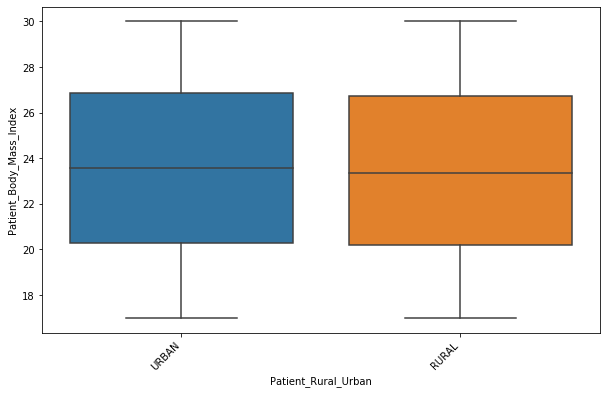

In [44]:
plt.figure(figsize = (10,6))
chart = sns.boxplot(x = 'Patient_Rural_Urban',y = 'Patient_Body_Mass_Index', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [45]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [46]:
cont_col = ['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
      'Patient_Age', 'Patient_Body_Mass_Index']

In [47]:
num_col = [ 'Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
        'Number_of_prev_cond', 'Survived_1_year']

In [48]:
for i in range(len(pharma_data['A'])):
    if pharma_data.loc[i,'A'] == "NULL":
        print(i)

In [49]:
for i in cont_col:
    print(pharma_data[i].skew(), i)

-0.010924029784616008 ID_Patient_Care_Situation
0.009314726511059718 Diagnosed_Condition
-0.004117939486212324 Patient_ID
-0.011361875236405762 Patient_Age
0.03120089865901398 Patient_Body_Mass_Index


In [50]:
pharma_data[pharma_data.isna().any(axis = 1)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
27,4691,31,4500,DX2,44,27.935658,YES,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36,4869,28,6826,DX1,4,17.342624,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,32899,24,7275,DX2 DX5,12,20.994843,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,9311,13,7538,DX2,49,26.641499,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
105,13511,44,7903,DX4,41,28.079769,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,6195,3,7812,DX2,26,26.548517,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23012,20220,48,12318,DX4,15,18.849124,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23024,25571,6,3423,DX2,13,24.343030,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23038,644,30,8032,DX3 DX5,45,19.272509,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [51]:
pharma_data['Number_of_prev_cond'].value_counts()

1.0    9386
2.0    9016
3.0    3026
4.0     397
5.0      37
Name: Number_of_prev_cond, dtype: int64

In [52]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [53]:
for i in pharma_data.columns:
    if pharma_data[i].isnull().sum() != 0:
        print("Null Exits", i)

Null Exits A
Null Exits B
Null Exits C
Null Exits D
Null Exits E
Null Exits F
Null Exits Z
Null Exits Number_of_prev_cond


[Text(0, 0, 'URBAN'), Text(0, 0, 'RURAL')]

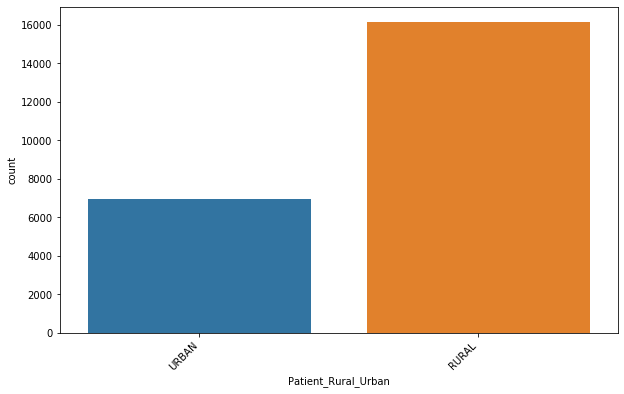

In [54]:
plt.figure(figsize = (10,6))
chart = sns.countplot(x = 'Patient_Rural_Urban', data = pharma_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [55]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [56]:
pharma_data.Patient_mental_condition.value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

[Text(0, 0, 'Stable')]

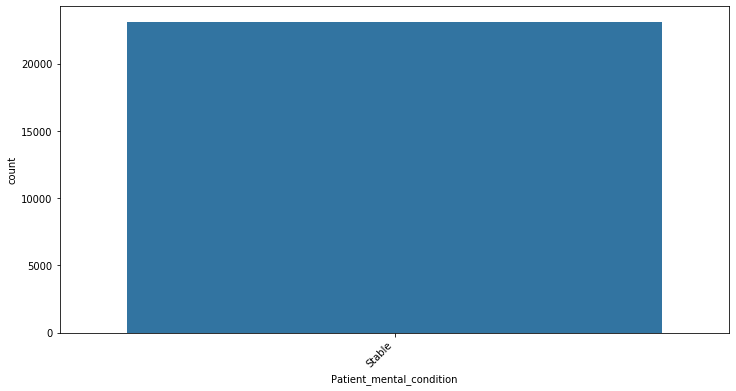

In [57]:
plt.figure(figsize = (12,6))
chart = sns.countplot(pharma_data['Patient_mental_condition'])
chart.set_xticklabels(chart.get_xticklabels(),rotation = 45, horizontalalignment = 'right')

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0')]

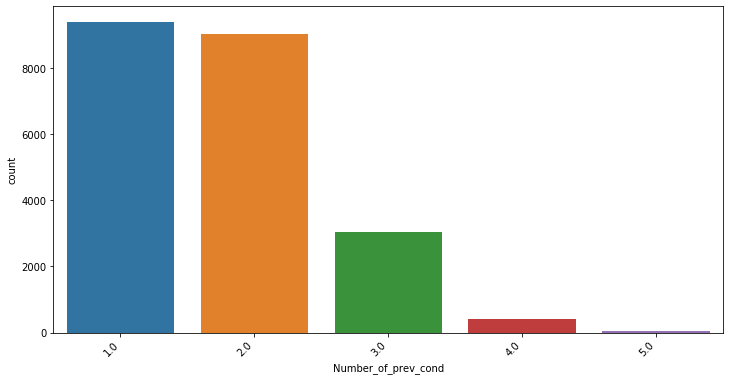

In [58]:
plt.figure(figsize = (12,6))
chart = sns.countplot(pharma_data['Number_of_prev_cond'])
chart.set_xticklabels(chart.get_xticklabels(),rotation = 45, horizontalalignment = 'right')

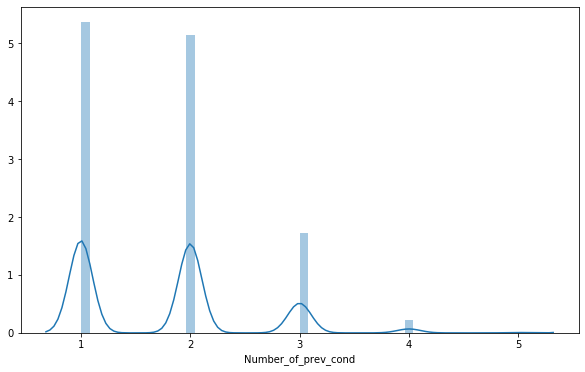

In [59]:
plt.figure(figsize=(10, 6))
sns.distplot(pharma_data['Number_of_prev_cond'])

[Text(0, 0, '0'), Text(0, 0, '1')]

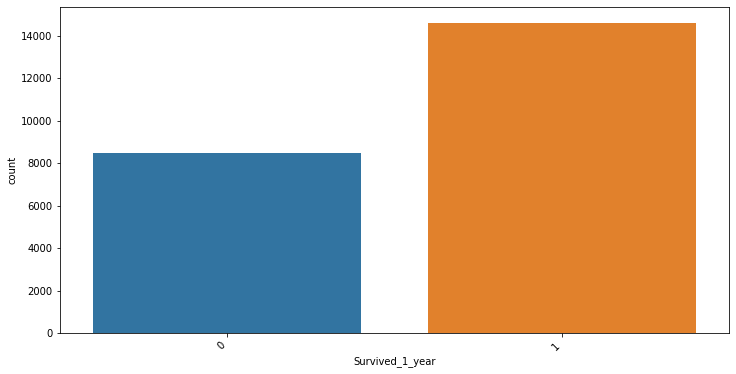

In [60]:
plt.figure(figsize = (12,6))
chart = sns.countplot(pharma_data['Survived_1_year'])
chart.set_xticklabels(chart.get_xticklabels(),rotation = 45, horizontalalignment = 'right')

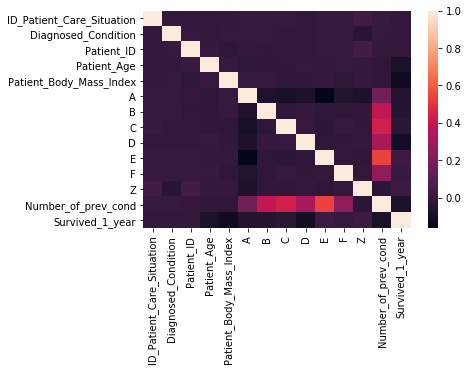

In [61]:
sns.heatmap(pharma_data.corr())

In [62]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,33,23.000000,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [63]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [64]:
pharma_data.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.007446,0.000235,-0.004465,-0.001792,0.004557,0.005110,0.010724,-0.006509,0.000575,0.007779,0.042146,0.011111,-0.004685
Diagnosed_Condition,-0.007446,1.000000,0.008315,-0.004250,0.002751,0.004940,0.003936,-0.002826,-0.007843,0.007902,0.005931,-0.042806,0.004844,-0.004450
Patient_ID,0.000235,0.008315,1.000000,0.009451,-0.017841,-0.005371,-0.012235,-0.006363,-0.004678,0.000746,0.007838,0.042348,-0.008344,-0.004214
Patient_Age,-0.004465,-0.004250,0.009451,1.000000,0.009118,-0.019240,-0.012452,-0.011643,0.004407,-0.002256,0.007463,-0.000289,-0.016651,-0.077615
Patient_Body_Mass_Index,-0.001792,0.002751,-0.017841,0.009118,1.000000,0.009839,0.001063,-0.018631,-0.009489,-0.006423,-0.016560,-0.002929,-0.017475,-0.120554
A,0.004557,0.004940,-0.005371,-0.019240,0.009839,1.000000,-0.063683,-0.089832,-0.076064,-0.163082,-0.054378,-0.072338,0.170448,-0.049886
B,0.005110,0.003936,-0.012235,-0.012452,0.001063,-0.063683,1.000000,-0.021175,-0.002050,-0.017804,-0.016013,-0.009692,0.392773,-0.049805
C,0.010724,-0.002826,-0.006363,-0.011643,-0.018631,-0.089832,-0.021175,1.000000,0.007528,-0.026294,0.000903,-0.011624,0.445349,-0.033356
D,-0.006509,-0.007843,-0.004678,0.004407,-0.009489,-0.076064,-0.002050,0.007528,1.000000,-0.013478,-0.009650,-0.007368,0.320736,-0.105710
E,0.000575,0.007902,0.000746,-0.002256,-0.006423,-0.163082,-0.017804,-0.026294,-0.013478,1.000000,-0.005260,-0.019637,0.541840,0.021527


In [65]:
pharma_data.drop(labels = ['A','B','C', "D",'E','F','Z'], axis = 1, inplace = True)

In [66]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,1
4,33012,0,12513,DX6,33,23.000000,Cannot say,RURAL,Stable,1.0,1


In [67]:
pharma_data.dropna(axis = 0, inplace = True)

In [68]:
pharma_data.reset_index(inplace = True, drop = True)

In [69]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [70]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,1
4,33012,0,12513,DX6,33,23.000000,Cannot say,RURAL,Stable,1.0,1


* **Finding Encoded Values of relevant columns in Dataset**

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
labelencoder = LabelEncoder()

In [73]:
cont_col

['ID_Patient_Care_Situation',
 'Diagnosed_Condition',
 'Patient_ID',
 'Patient_Age',
 'Patient_Body_Mass_Index']

In [74]:
num_col

['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition',
 'Number_of_prev_cond',
 'Survived_1_year']

In [75]:
table_1= pd.crosstab(pharma_data.Survived_1_year, pharma_data.Treated_with_drugs)
table_2= pd.crosstab(pharma_data.Survived_1_year, pharma_data.Patient_Smoker)
table_3= pd.crosstab(pharma_data.Survived_1_year, pharma_data.Patient_Rural_Urban)
table_4= pd.crosstab(pharma_data.Survived_1_year, pharma_data.Patient_mental_condition)
table_5= pd.crosstab(pharma_data.Survived_1_year, pharma_data.Number_of_prev_cond)

In [76]:
table_1

Treated_with_drugs,DX1,DX1 DX2,DX1 DX2 DX3,DX1 DX2 DX3 DX4,DX1 DX2 DX3 DX4 DX5,DX1 DX2 DX3 DX5,DX1 DX2 DX4,DX1 DX2 DX4 DX5,DX1 DX2 DX5,DX1 DX3,...,DX2 DX4 DX5,DX2 DX5,DX3,DX3 DX4,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6
Survived_1_year,,,,,,,,,,,,,,,,,,,,,
0,439,145,28,5,0,2,30,5,20,77,...,12,65,458,113,14,59,522,88,337,4819
1,1308,277,58,19,3,12,63,12,78,320,...,66,306,1283,313,74,319,1175,314,1475,3342


In [77]:
table_2

Patient_Smoker,Cannot say,NO,YES
Survived_1_year,,,
0,0,3375,4832
1,13,9144,4498


In [78]:
table_3

Patient_Rural_Urban,RURAL,URBAN
Survived_1_year,,
0,5199,3008
1,10093,3562


In [79]:
table_4

Patient_mental_condition,Stable
Survived_1_year,
0,8207
1,13655


In [80]:
table_5

Number_of_prev_cond,1.0,2.0,3.0,4.0,5.0
Survived_1_year,,,,,
0,3275,3360,1290,247,35
1,6111,5656,1736,150,2


* **Feature Selection using Chi- Squared Statistic**

In [81]:
def accept_reject(a):
    
    # Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
    stat, p, dof, expected = chi2_contingency(a)
    # select significance value
    alpha = 0.05
    # Determine whether to reject or keep your null hypothesis
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Variables are associated (reject H0)')
    else:
        print('Variables are not associated(fail to reject H0)')



In [82]:
print("Table 1 \n", num_col[0], accept_reject(table_1))
print("Table 2 \n", num_col[1], accept_reject(table_2))
print("Table 3 \n", num_col[2], accept_reject(table_3))
print("Table 4 \n", num_col[3], accept_reject(table_4))
print("Table 5 \n", num_col[4], accept_reject(table_5))

significance=0.050, p=0.000
Variables are associated (reject H0)
Table 1 
 Treated_with_drugs None
significance=0.050, p=0.000
Variables are associated (reject H0)
Table 2 
 Patient_Smoker None
significance=0.050, p=0.000
Variables are associated (reject H0)
Table 3 
 Patient_Rural_Urban None
significance=0.050, p=1.000
Variables are not associated(fail to reject H0)
Table 4 
 Patient_mental_condition None
significance=0.050, p=0.000
Variables are associated (reject H0)
Table 5 
 Number_of_prev_cond None


In [83]:
# 'Treated_with_drugs',
#  'Patient_Smoker',
#  'Patient_Rural_Urban',
#  'Patient_mental_condition',
#  'Number_of_prev_cond',
#  'Survived_1_year'

In [84]:
num_col

['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition',
 'Number_of_prev_cond',
 'Survived_1_year']

In [85]:
label_encoder = LabelEncoder()
for i in num_col:
    pharma_data[i] = label_encoder.fit_transform(pharma_data[i])

In [86]:
from sklearn.feature_selection import chi2

X = pharma_data[num_col[:-1]]
y = pharma_data['Survived_1_year']

chi_scores = chi2(X,y)
chi_scores

(array([3482.18712453,  243.56277442,  190.42692716,           nan,
         113.85153221]),
 array([0.00000000e+00, 6.57483705e-55, 2.56532624e-43,            nan,
        1.40439832e-26]))

In [87]:
chi_scores[1]

array([0.00000000e+00, 6.57483705e-55, 2.56532624e-43,            nan,
       1.40439832e-26])

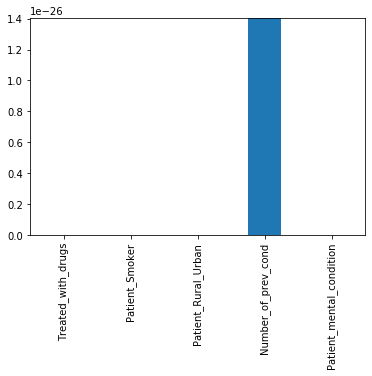

In [88]:
p_values = pd.Series(chi_scores[1],index = num_col[:-1])
p_values.sort_values(ascending = True , inplace = True)

p_values.plot.bar()

In [89]:
num_col

['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition',
 'Number_of_prev_cond',
 'Survived_1_year']

In [90]:
# Associated: 'Treated_with_drugs' 'Patient_Smoker' 'Patient_Rural_Urban' 'Patient_mental_condition',
# Not Associated: 'Number_of_prev_cond'

In [91]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder()

In [92]:
# drugs = pd.get_dummies(pharma_data['Treated_with_drugs'], columns=["Treated_with_drugs"], prefix = "drugs" )
# smoke = pd.get_dummies(pharma_data['Patient_Smoker'], columns=["Patient_Smoker"], prefix = "Smoker" )
# urban_rural = pd.get_dummies(pharma_data['Patient_Rural_Urban'], columns=["Patient_Rural_Urban"], prefix = "Rural_Urban" )
# condition = pd.get_dummies(pharma_data['Patient_mental_condition'], columns=["Patient_mental_condition"], prefix = "condition" )

In [93]:
# pharma_data.drop(labels = ['Number_of_prev_cond'], inplace = True, axis =1)

In [94]:
#If Number_of_prev_cond is considered instead of Patient_mental_condition

In [95]:
drugs = pd.get_dummies(pharma_data['Treated_with_drugs'], columns=["Treated_with_drugs"], prefix = "drugs" )
smoke = pd.get_dummies(pharma_data['Patient_Smoker'], columns=["Patient_Smoker"], prefix = "Smoker" )
prev_cond = pd.get_dummies(pharma_data['Patient_Rural_Urban'], columns=["Patient_Rural_Urban"], prefix = "prev_cond" )
condition = pd.get_dummies(pharma_data['Number_of_prev_cond'], columns=["Number_of_prev_cond"], prefix = "condition" )
urban_rural = pd.get_dummies(pharma_data['Patient_Rural_Urban'], columns=["Patient_Rural_Urban"], prefix = "Rural_Urban" )

In [96]:
#pharma_data.drop(labels = ['Patient_Rural_Urban'], inplace = True, axis =1)

In [97]:
condition

,condition_0,condition_1,condition_2,condition_3,condition_4
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21857,0,0,0,0,1
21858,1,0,0,0,0
21859,1,0,0,0,0
21860,0,1,0,0,0


In [98]:
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,31,56,18.479385,2,1,0,1,0
1,18164,5,5740,16,36,22.945566,2,0,0,0,1
2,6283,23,10446,31,48,27.510027,2,0,0,0,0
3,5339,51,12011,0,5,19.130976,1,1,0,0,1
4,33012,0,12513,31,33,23.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
21857,15613,3,1548,21,14,18.643448,1,0,0,4,0
21858,15503,41,2769,31,55,23.684585,1,0,0,0,1
21859,2167,24,7671,31,63,27.500039,2,0,0,0,0
21860,31646,11,5764,24,25,23.719125,2,0,0,1,1


In [99]:
# df = pd.concat([drugs, smoke, urban_rural,condition], axis=1) 

In [100]:
df = pd.concat([drugs, smoke, prev_cond,condition, urban_rural], axis=1) 

In [101]:
df.isnull().sum()

drugs_0          0
drugs_1          0
drugs_2          0
drugs_3          0
drugs_4          0
drugs_5          0
drugs_6          0
drugs_7          0
drugs_8          0
drugs_9          0
drugs_10         0
drugs_11         0
drugs_12         0
drugs_13         0
drugs_14         0
drugs_15         0
drugs_16         0
drugs_17         0
drugs_18         0
drugs_19         0
drugs_20         0
drugs_21         0
drugs_22         0
drugs_23         0
drugs_24         0
drugs_25         0
drugs_26         0
drugs_27         0
drugs_28         0
drugs_29         0
drugs_30         0
drugs_31         0
Smoker_0         0
Smoker_1         0
Smoker_2         0
prev_cond_0      0
prev_cond_1      0
condition_0      0
condition_1      0
condition_2      0
condition_3      0
condition_4      0
Rural_Urban_0    0
Rural_Urban_1    0
dtype: int64

In [102]:
cont_col

['ID_Patient_Care_Situation',
 'Diagnosed_Condition',
 'Patient_ID',
 'Patient_Age',
 'Patient_Body_Mass_Index']

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [105]:
pharma_data[cont_col]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index
0,22374,8,3333,56,18.479385
1,18164,5,5740,36,22.945566
2,6283,23,10446,48,27.510027
3,5339,51,12011,5,19.130976
4,33012,0,12513,33,23.000000
...,...,...,...,...,...
21857,15613,3,1548,14,18.643448
21858,15503,41,2769,55,23.684585
21859,2167,24,7671,63,27.500039
21860,31646,11,5764,25,23.719125


In [106]:
pharma_data = pd.concat([pharma_data[cont_col], df, pharma_data[['Survived_1_year']]], axis = 1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(pharma_data.iloc[:,:-1], pharma_data.iloc[:,-1], random_state=1)

In [108]:
pca_train = X_train[cont_col]
pca_test = X_test[cont_col]

In [109]:
pca_test.shape

(5466, 5)

In [110]:
pca_train.shape

(16396, 5)

* **Standardising and applying PCA**

In [111]:
## Performing standardization before applying PCA
scaler = StandardScaler()
scaler.fit(pca_train)
X_train2 = scaler.transform(pca_train)
print(X_train2)

scaler.fit(pca_test)
X_test2 = scaler.transform(pca_test)
print(X_test2)


[[ 0.83643411 -0.16416192 -1.63363334 -0.89063056 -1.20929827]
 [ 1.50623714  1.63405572 -1.11174455  1.42816235 -0.63573545]
 [ 1.57582706 -0.29736322  1.24968407  1.685806    0.80089677]
 ...
 [-0.30362494  0.03564004 -1.07170619  1.42816235  1.43179592]
 [ 1.22588616 -0.23076257  0.29766104  1.53121981 -0.48563734]
 [ 1.12097725  1.50085441  0.93271378  0.29453026  0.59308565]]
[[-0.36431325  1.11727191  1.68309386  1.13191024 -1.03113239]
 [-0.42779889 -0.0755808  -1.61412884  1.59635098 -1.49313064]
 [-0.85488409  0.91846312 -1.32338456 -0.88066626 -0.97161294]
 ...
 [-0.79800935  0.71965434  1.40258511  1.38993287 -1.41978473]
 [-1.39110162 -0.0755808   1.15333621 -0.00338932  1.65242944]
 [-1.26654384 -0.34065918 -0.58780983 -1.19029341  0.69101608]]


In [112]:
pca = PCA(n_components = 5)
pca.fit(X_train2)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## It will give eigen values
print(pca.explained_variance_)


X_train_pca = pca.transform(X_train2)
print("original shape:   ", X_train2.shape)
print("transformed shape:", X_train_pca.shape)


X_test_pca = pca.transform(X_test2)
print("original shape:   ", X_test2.shape)
print("transformed shape:", X_test_pca.shape)

[1.02160616 1.00860271 1.00534533 0.99552578 0.96922499]
original shape:    (16396, 5)
transformed shape: (16396, 5)
original shape:    (5466, 5)
transformed shape: (5466, 5)


In [113]:
X_train_pca

array([[ 0.01408437,  0.79188272, -1.78855768, -0.37919735, -1.29651391],
       [-0.30521214, -0.31658792,  0.05379733,  1.49694527, -2.4862723 ],
       [ 0.78442125, -1.99313176,  0.36657613,  1.68737256,  0.21736711],
       ...,
       [-1.68698604, -1.47247275,  0.43536156,  0.01927771, -0.35733808],
       [ 0.93961026, -1.36675928,  0.03220347,  0.76810237, -0.93979327],
       [ 0.06127601,  0.17249986,  0.66812647,  2.08253843, -0.02715446]])

In [114]:
X_test_pca

array([[ 1.39084236,  0.16070177,  2.01682619,  0.52143296, -0.50846109],
       [-0.04865281, -0.69895876,  0.16156079, -1.23032636, -2.35397462],
       [-0.68194788,  1.62548429, -0.1422437 , -0.87514107, -1.07331054],
       ...,
       [ 1.48585858, -0.03786115,  2.05334024, -0.19996556, -0.77734602],
       [-0.71849858, -0.28010212,  1.36344328, -0.18524066,  1.87446153],
       [-1.10117187,  0.74326459, -0.24476248, -1.10016885,  0.96161431]])

In [115]:
pca_test_df = pd.DataFrame(data = X_test_pca, columns = ['principal component 1', 'principal component 2',
                                                         'principal component 3', 'principal component 4',
                                                         'principal component 5'])

In [116]:
pca_train_df = pd.DataFrame(data = X_train_pca, columns = ['principal component 1', 'principal component 2',
                                                         'principal component 3', 'principal component 4',
                                                         'principal component 5'])

In [117]:
pca_train_df.shape

(16396, 5)

In [118]:
pca_test_df.shape

(5466, 5)

In [119]:
list1 = []
for i in X_train.columns:
    if i not in cont_col:
        list1.append(i)

In [120]:
y_train

2209     0
13374    1
10995    0
9063     1
19390    1
        ..
10955    1
17289    0
5192     0
12172    0
235      1
Name: Survived_1_year, Length: 16396, dtype: int64

In [121]:
#train_df.shape

In [122]:
X_train.shape

(16396, 49)

In [123]:
X_test.shape

(5466, 49)

In [124]:
y_test.shape

(5466,)

In [125]:
one_hot_train = X_train[list1].reset_index()
one_hot_train.drop(labels = ['index'], inplace = True, axis = 1)

In [126]:
one_hot_train.head()

,drugs_0,drugs_1,drugs_2,drugs_3,drugs_4,drugs_5,drugs_6,drugs_7,drugs_8,drugs_9,...,Smoker_2,prev_cond_0,prev_cond_1,condition_0,condition_1,condition_2,condition_3,condition_4,Rural_Urban_0,Rural_Urban_1
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [127]:
target_train = y_train.reset_index()
target_train.drop(labels = ['index'], inplace = True, axis = 1)

In [128]:
one_hot_test = X_test[list1].reset_index()
one_hot_test.drop(labels = ['index'], inplace = True, axis = 1)

In [129]:
one_hot_test.head()

,drugs_0,drugs_1,drugs_2,drugs_3,drugs_4,drugs_5,drugs_6,drugs_7,drugs_8,drugs_9,...,Smoker_2,prev_cond_0,prev_cond_1,condition_0,condition_1,condition_2,condition_3,condition_4,Rural_Urban_0,Rural_Urban_1
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [130]:
target_test = y_test.reset_index()
target_test.drop(labels = ['index'], inplace = True, axis = 1)

In [131]:
target_test.isnull().sum()

Survived_1_year    0
dtype: int64

In [132]:
pca_train_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,0.014084,0.791883,-1.788558,-0.379197,-1.296514
1,-0.305212,-0.316588,0.053797,1.496945,-2.486272
2,0.784421,-1.993132,0.366576,1.687373,0.217367
3,1.240075,-0.232139,-0.735434,-0.553020,0.136030
4,-1.217041,0.603534,-1.226867,-1.371108,1.060707


In [133]:
pca_test_df.shape 

(5466, 5)

In [134]:
one_hot_test.shape

(5466, 44)

In [135]:
target_test.shape

(5466, 1)

In [136]:
train_df = pd.concat([pca_train_df, one_hot_train, target_train], axis = 1)
test_df = pd.concat([pca_test_df, one_hot_test, target_test], axis = 1)

In [137]:
train_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,drugs_0,drugs_1,drugs_2,drugs_3,drugs_4,...,prev_cond_0,prev_cond_1,condition_0,condition_1,condition_2,condition_3,condition_4,Rural_Urban_0,Rural_Urban_1,Survived_1_year
0,0.014084,0.791883,-1.788558,-0.379197,-1.296514,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,-0.305212,-0.316588,0.053797,1.496945,-2.486272,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,0.784421,-1.993132,0.366576,1.687373,0.217367,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1.240075,-0.232139,-0.735434,-0.553020,0.136030,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
4,-1.217041,0.603534,-1.226867,-1.371108,1.060707,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


In [138]:
train_X = train_df.iloc[:,:-1]
train_y = train_df.iloc[:,-1]

In [139]:
test_X = test_df.iloc[:,:-1]

In [140]:
test_y = test_df.iloc[:,-1]

In [141]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [142]:
predictions = classifier.predict(test_X)

In [143]:
confusion_matrix(test_y, predictions)

array([[1130,  931],
       [ 519, 2886]], dtype=int64)

* **Cleaning and testing on New test data**

In [144]:
eval_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [145]:
eval_data.drop(labels = ['A','B','C','D','E','F','Z'], axis = 1, inplace = True)

In [146]:
for i in range(len(eval_data)):
    eval_data.loc[i,'Treated_with_drugs'] = eval_data.loc[i,'Treated_with_drugs'].upper() 

In [147]:
eval_data['Treated_with_drugs'].value_counts()

DX6                     2378
DX6                     1064
DX3                      532
DX1                      525
DX2                      516
                        ... 
DX2 DX3 DX4 DX5            2
DX1 DX2 DX3 DX4            2
DX1 DX2 DX3 DX4 DX5        1
DX1 DX2 DX4 DX5            1
DX1 DX2 DX3 DX4 DX5        1
Name: Treated_with_drugs, Length: 64, dtype: int64

In [148]:
num_col

['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition',
 'Number_of_prev_cond',
 'Survived_1_year']

In [149]:
label_encoder = LabelEncoder()
for i in num_col[:-1]:
    eval_data[i] = label_encoder.fit_transform(eval_data[i])

In [151]:
pca_test2 = eval_data[cont_col]

In [153]:
scaler.fit(pca_test2)
X_test3 = scaler.transform(pca_test2)
print(X_test3)

[[ 0.81735299  0.55390846 -0.44953511  1.63247057 -0.73131074]
 [ 1.72522519  0.22059022 -0.84442585 -1.60560915  0.20424669]
 [-1.34275311  1.28720859 -0.74750315 -1.65700724  0.96780305]
 ...
 [ 0.66865614  1.020554   -0.6926726  -1.09162824  1.61022688]
 [-1.46922968  0.55390846 -0.45895045 -0.57764733 -1.52646513]
 [ 1.11548386  1.08721764  0.07329359  1.52967439 -0.09870394]]


In [154]:
X_test_pca_2 = pca.transform(X_test3)
print("original shape:   ", X_test3.shape)
print("transformed shape:", X_test_pca_2.shape)

original shape:    (9330, 5)
transformed shape: (9330, 5)


In [155]:
pca_train_df_2 = pd.DataFrame(data = X_test_pca_2, columns = ['principal component 1', 'principal component 2',
                                                         'principal component 3', 'principal component 4',
                                                         'principal component 5'])

In [156]:
pca_train_df_2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,0.312884,-0.872164,0.333798,0.593585,-1.747686
1,-0.347288,0.914090,-2.032532,1.126674,-0.032616
2,-1.879585,1.888776,0.291059,-0.274481,0.663776
3,-1.788705,0.486028,0.931712,0.290753,0.563304
4,-0.871764,-0.044916,0.768846,-1.646458,-1.379667


In [174]:
num_col

['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition',
 'Number_of_prev_cond',
 'Survived_1_year']

In [179]:
drugs_2 = pd.get_dummies(eval_data['Treated_with_drugs'], columns=["Treated_with_drugs"], prefix = "drugs" )
smoke_2 = pd.get_dummies(eval_data['Patient_Smoker'], columns=["Patient_Smoker"], prefix = "Smoker" )
prev_cond_2 = pd.get_dummies(eval_data['Patient_Rural_Urban'], columns=["Patient_Rural_Urban"], prefix = "prev_cond" )
condition_2 = pd.get_dummies(eval_data['Number_of_prev_cond'], columns=["Number_of_prev_cond"], prefix = "condition" )
#urban_rural_2 = pd.get_dummies(eval_data['Patient_Rural_Urban'], columns=["Patient_Rural_Urban"], prefix = "Rural_Urban" )

In [180]:
df_2 = pd.concat([drugs_2, smoke_2, prev_cond_2,condition_2], axis=1) 

In [186]:
df_2

(9330, 77)

In [185]:
df.shape

(21862, 44)

In [181]:
#test_one_hot = eval_data[num_col[:-1]]

In [182]:
test_df2 = pd.concat([pca_train_df_2, df_2], axis = 1)

In [183]:
test_df2.isnull().sum()

principal component 1    0
principal component 2    0
principal component 3    0
principal component 4    0
principal component 5    0
                        ..
condition_0              0
condition_1              0
condition_2              0
condition_3              0
condition_4              0
Length: 82, dtype: int64

In [187]:
#predictions2 = classifier.predict(test_df2)